In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [29]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
sc.fit_transform(X)

array([[ 0.68536293,  1.        , -0.74947368, ...,  0.        ,
        -0.9       , -0.97576   ],
       [ 0.39218112, -1.        , -0.73172932, ...,  0.        ,
        -0.84      , -1.        ],
       [-0.22203669, -1.        , -0.52390977, ...,  0.        ,
        -0.72      , -1.        ],
       ...,
       [-0.12115934, -1.        , -0.84721805, ...,  0.        ,
        -0.9       , -1.        ],
       [ 0.68806987, -1.        , -0.58887218, ...,  0.        ,
        -0.88      , -0.99978   ],
       [-0.78618422,  1.        , -0.18045113, ..., -1.        ,
        -0.44      , -1.        ]])

In [30]:
#Training the model
from minisom import MiniSom

In [31]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [32]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [33]:
#Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

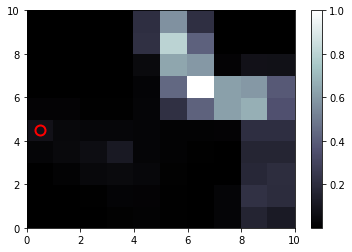

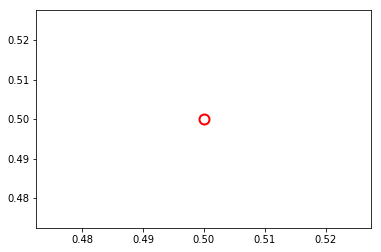

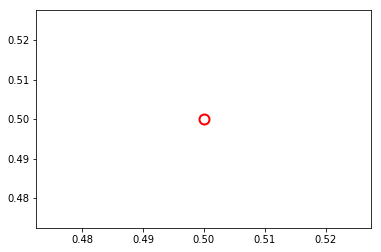

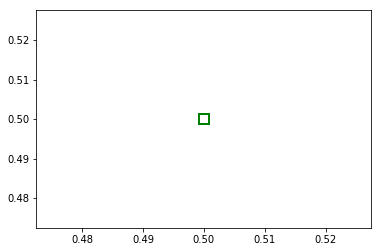

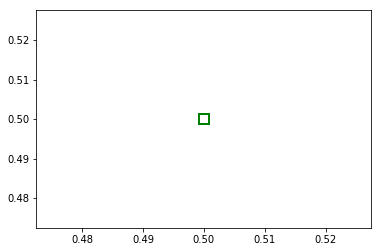

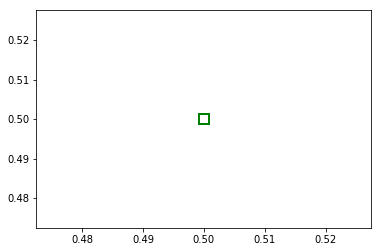

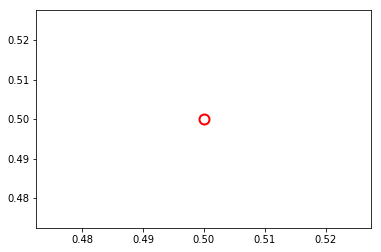

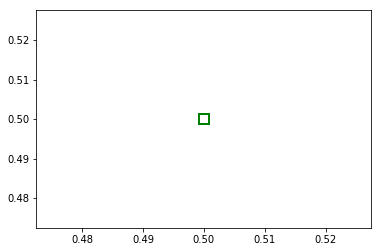

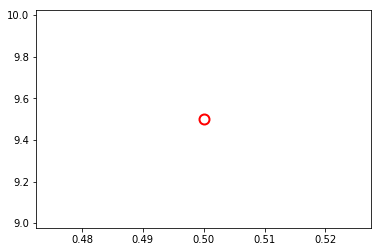

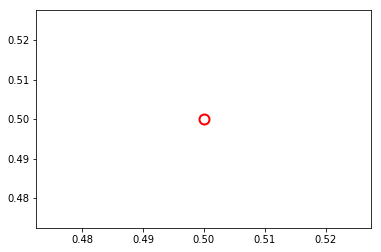

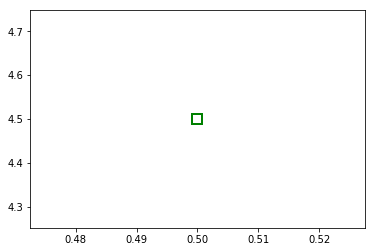

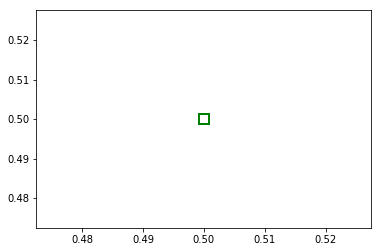

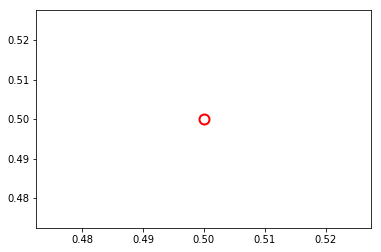

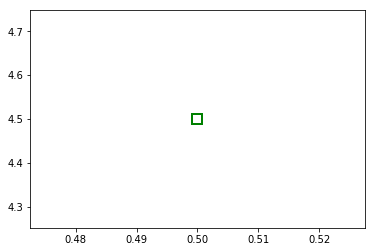

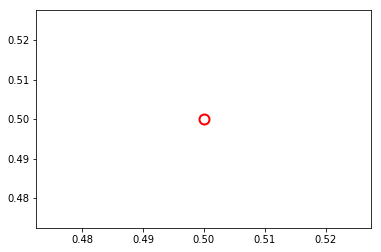

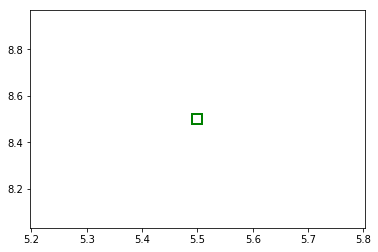

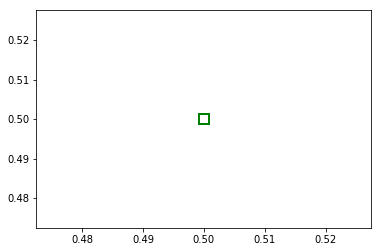

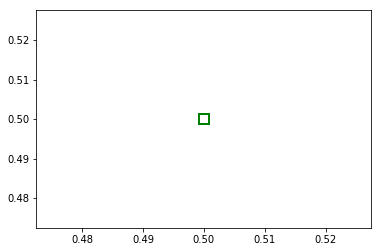

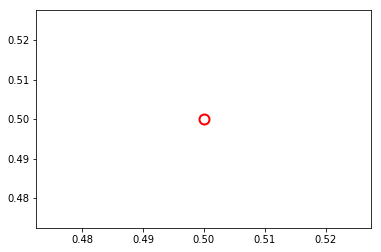

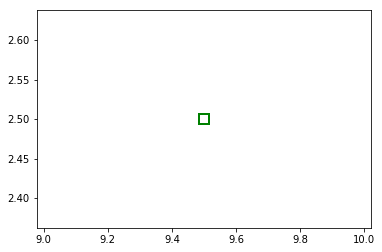

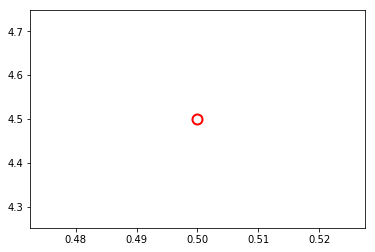

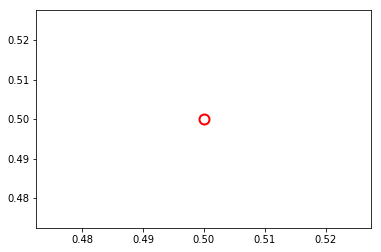

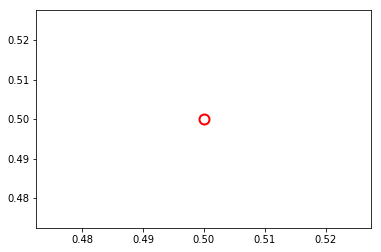

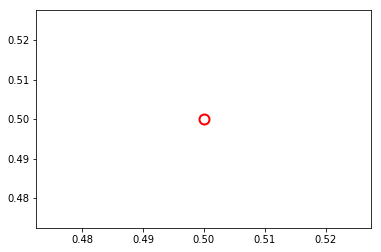

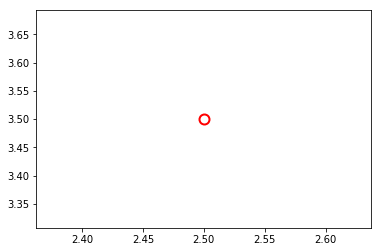

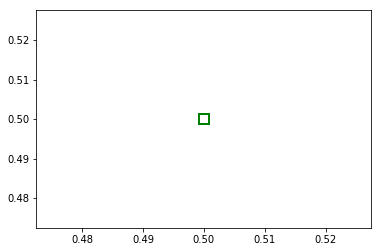

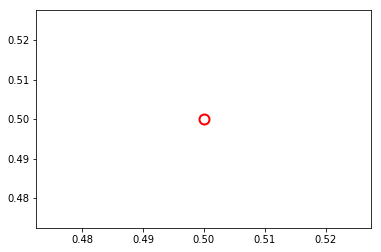

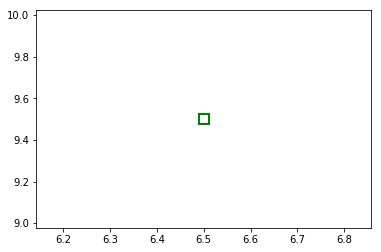

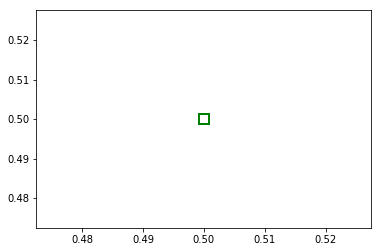

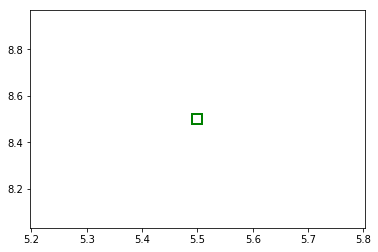

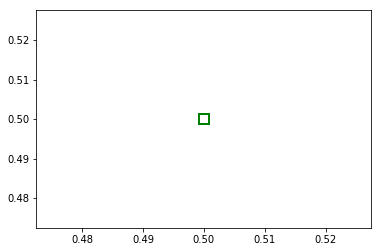

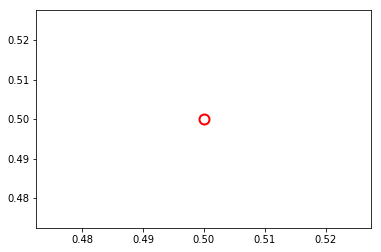

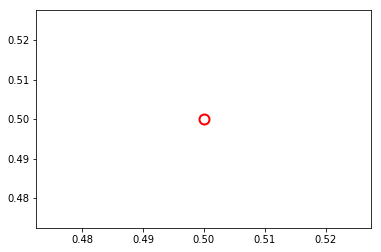

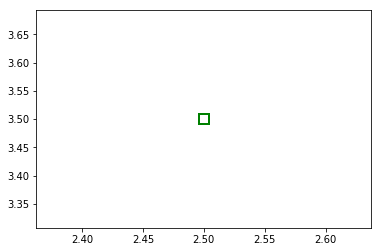

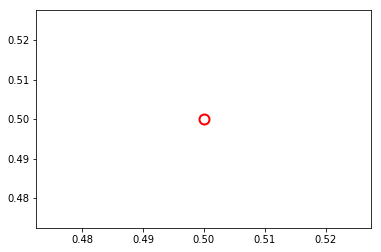

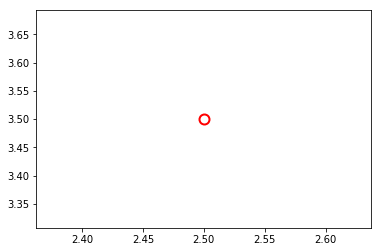

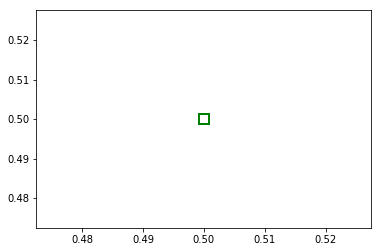

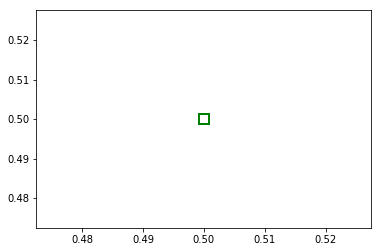

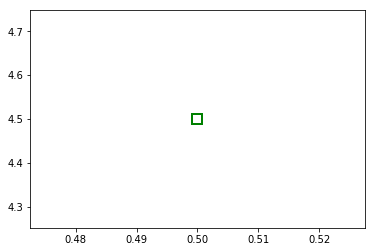

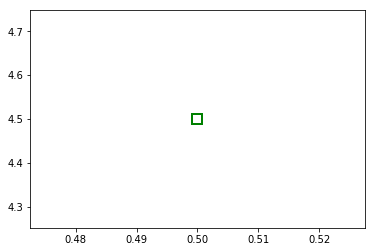

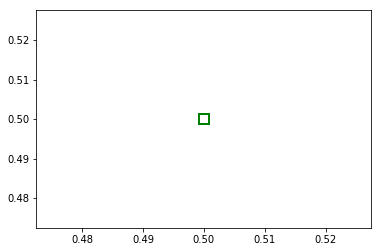

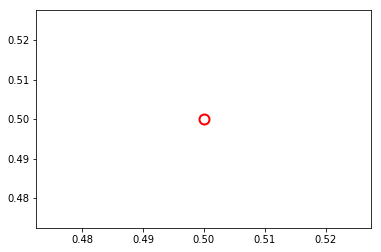

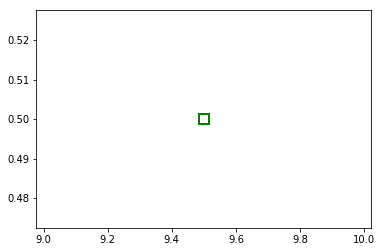

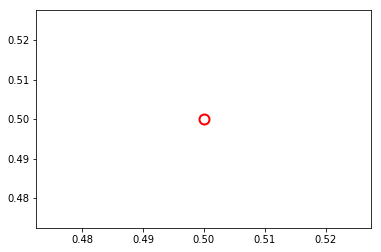

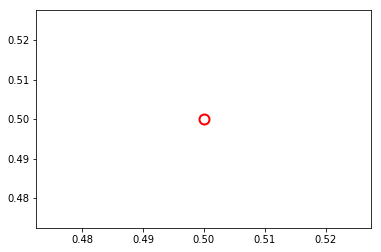

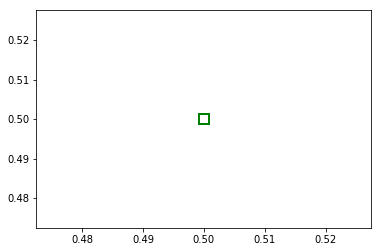

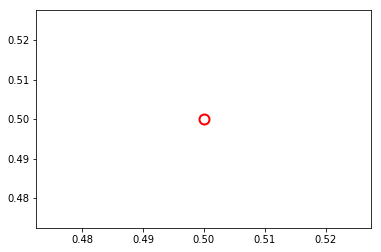

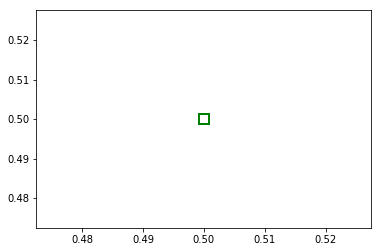

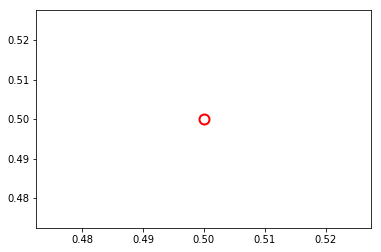

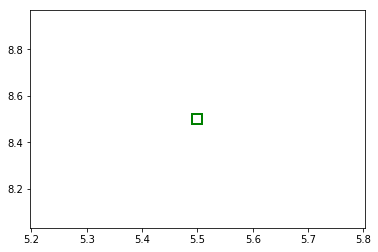

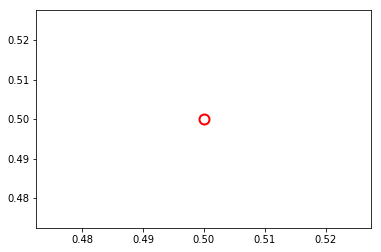

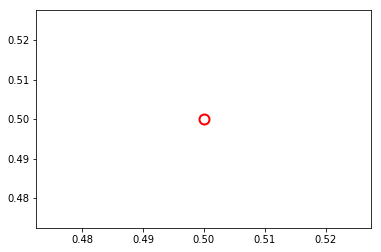

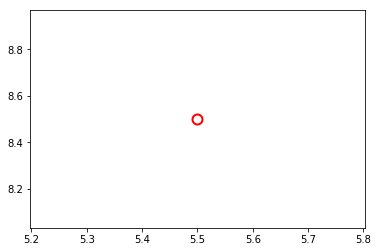

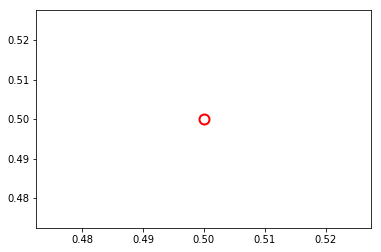

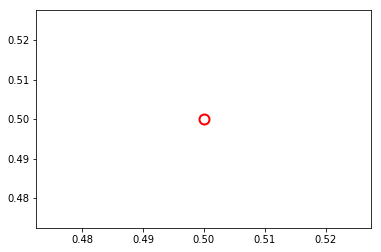

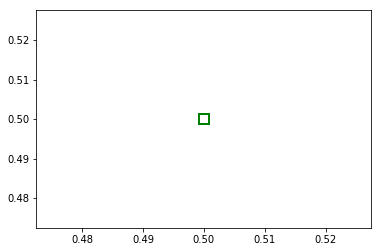

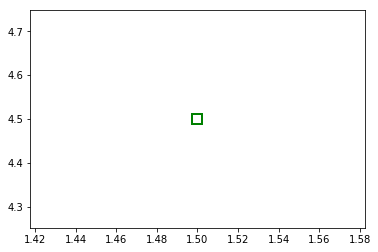

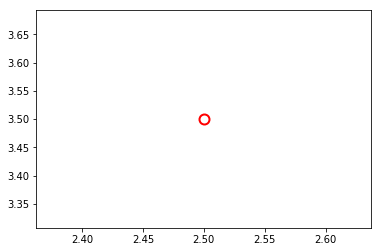

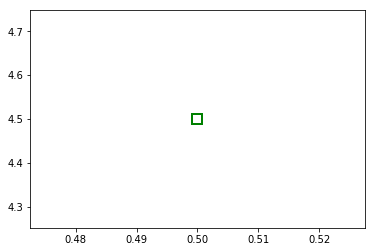

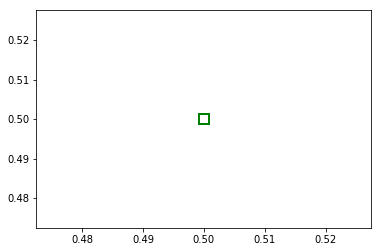

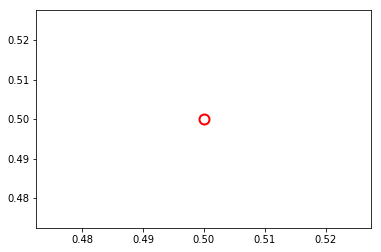

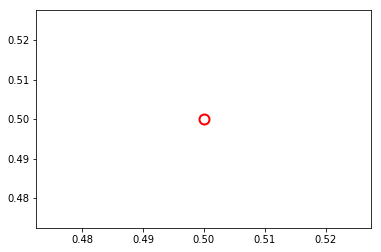

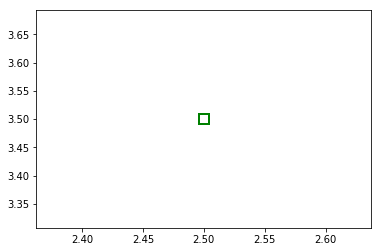

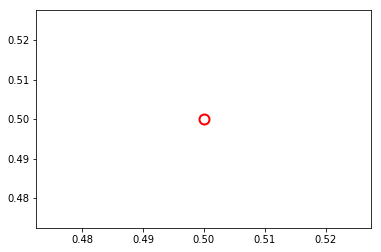

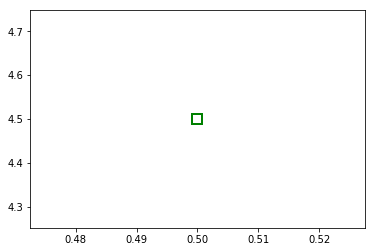

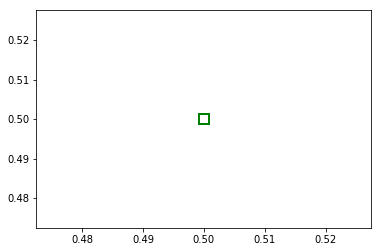

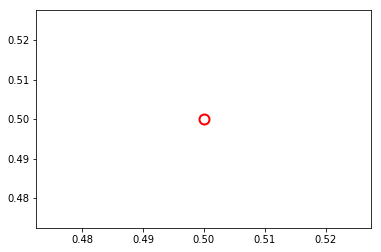

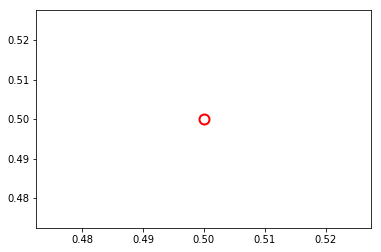

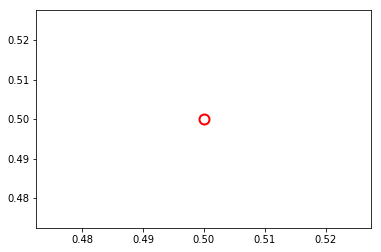

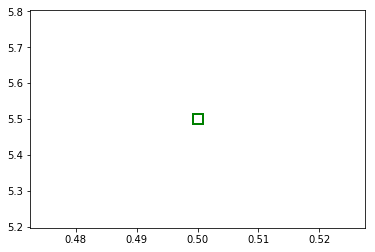

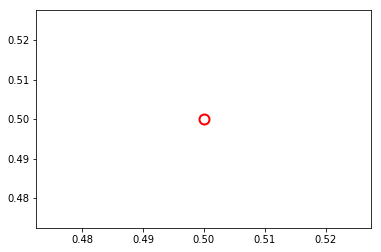

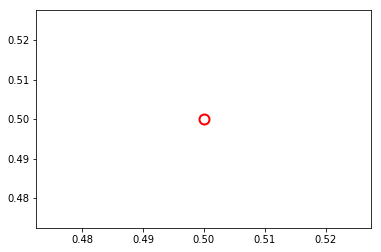

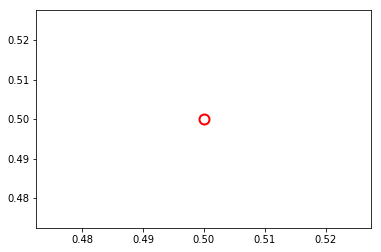

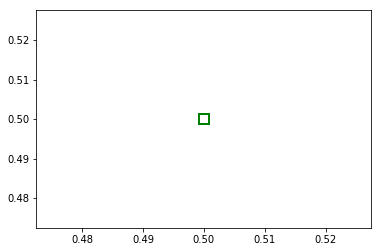

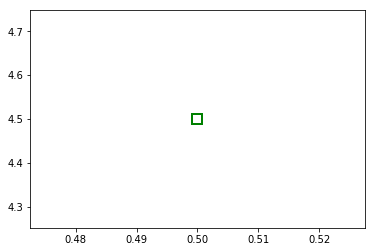

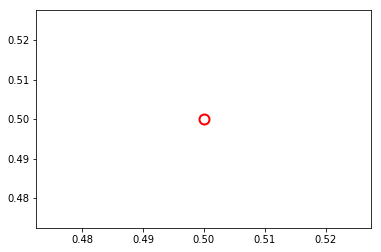

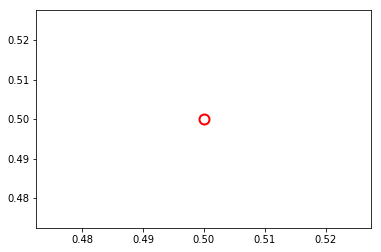

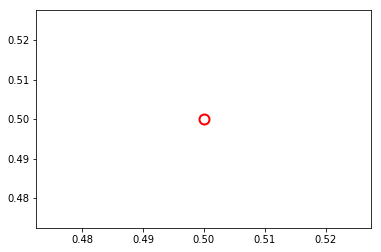

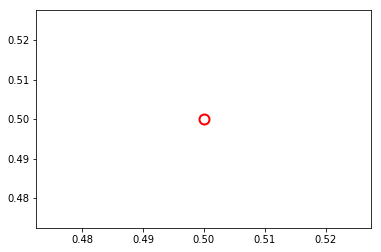

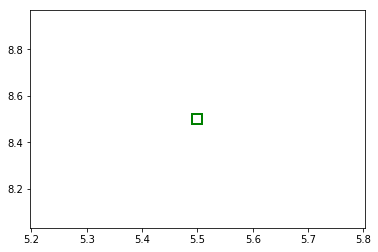

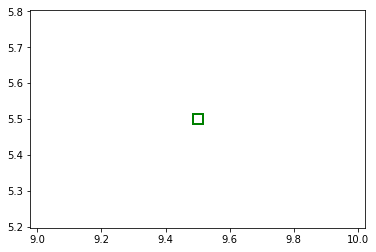

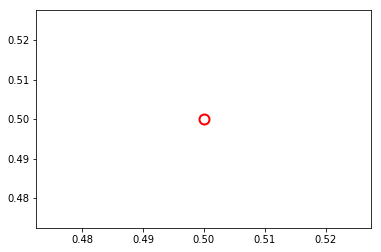

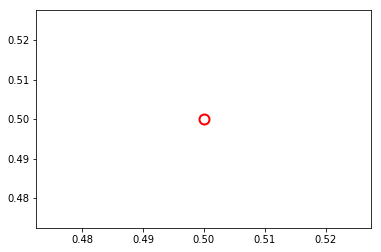

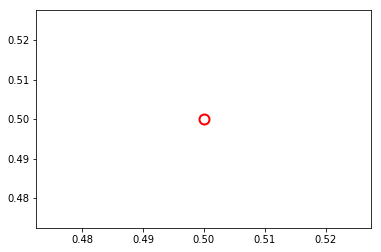

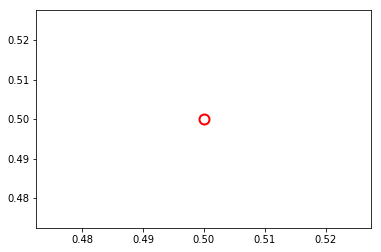

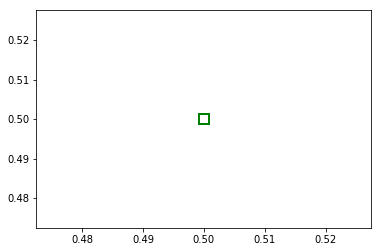

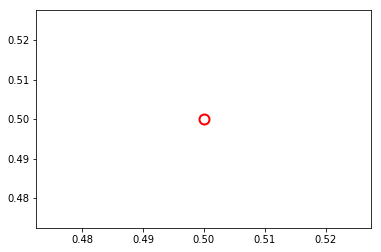

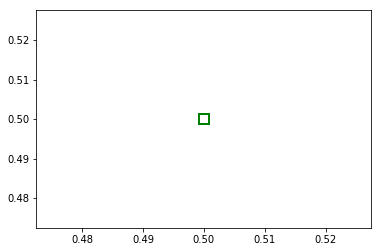

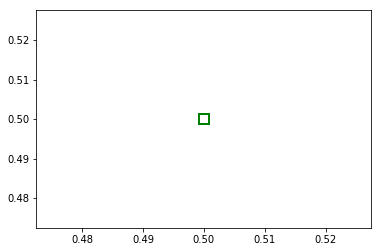

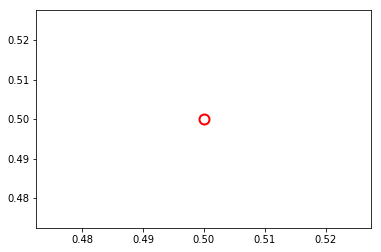

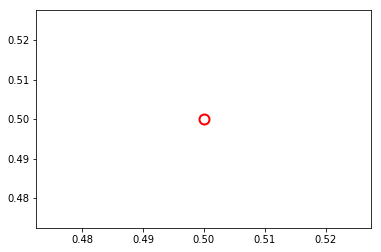

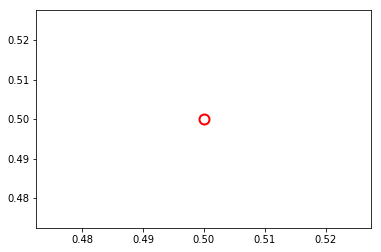

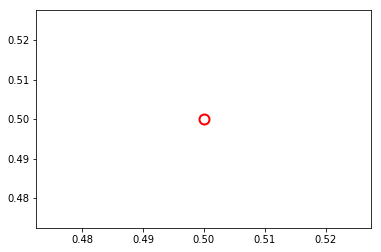

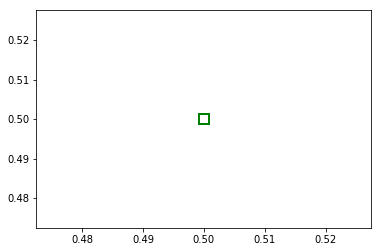

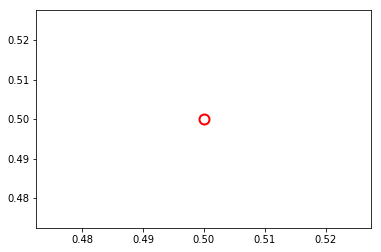

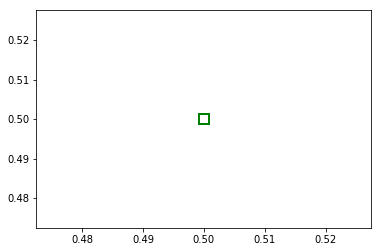

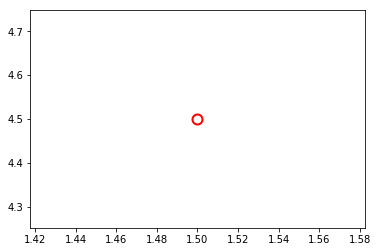

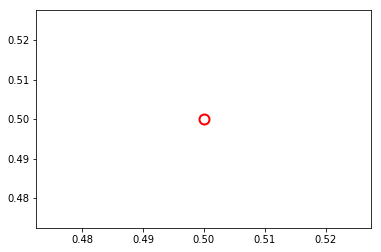

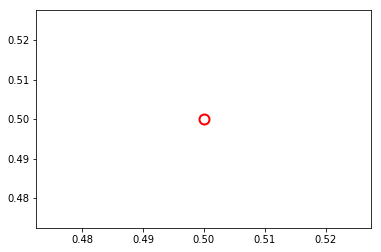

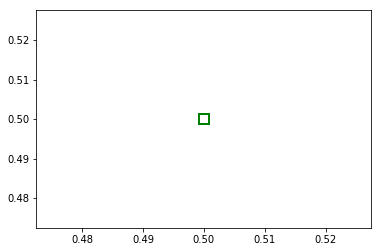

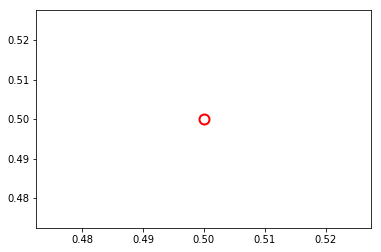

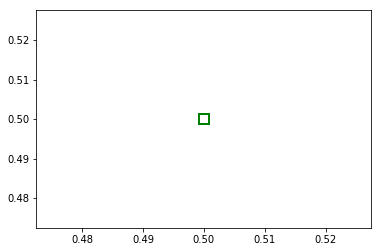

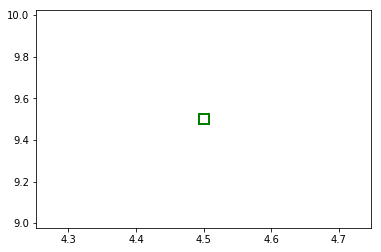

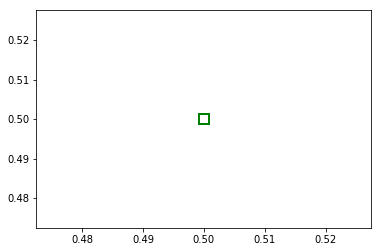

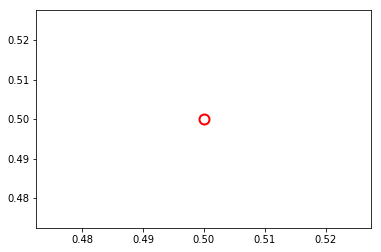

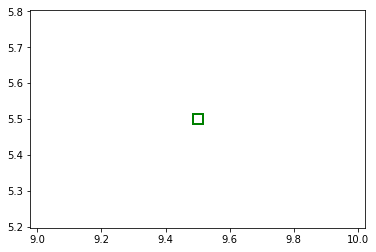

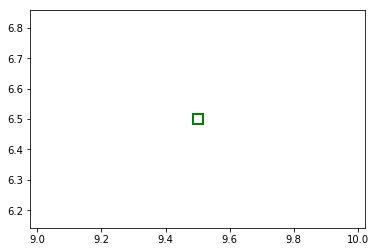

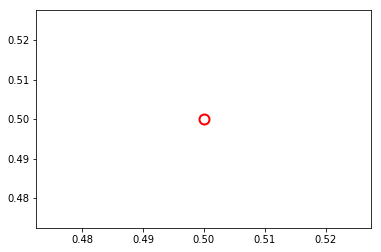

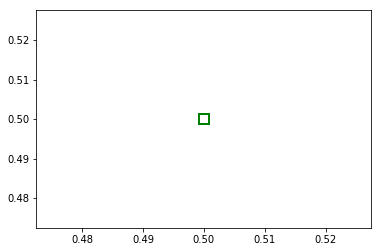

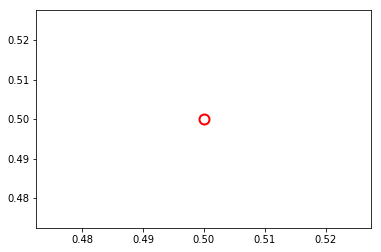

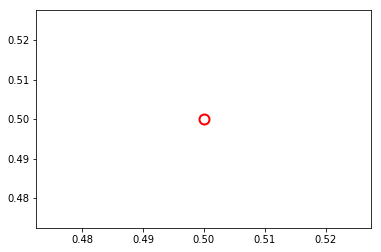

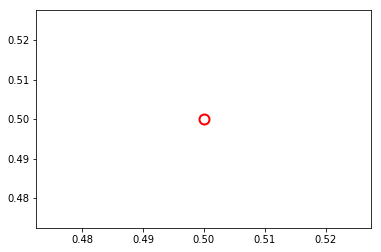

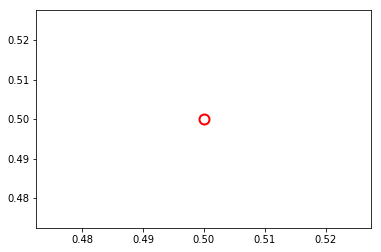

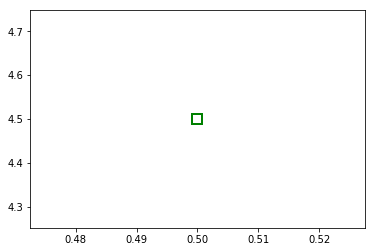

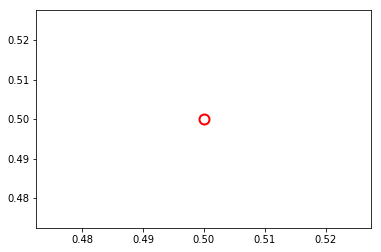

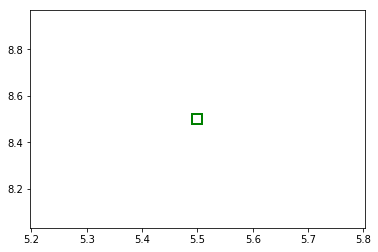

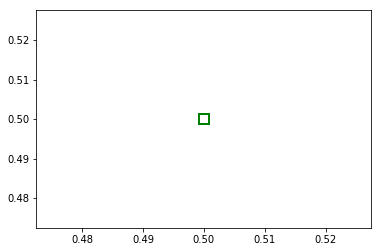

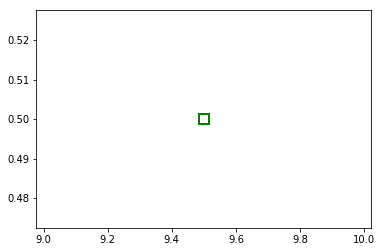

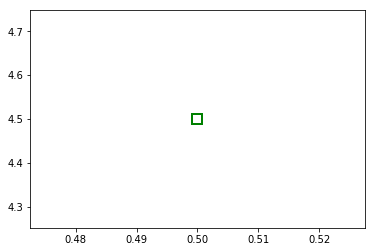

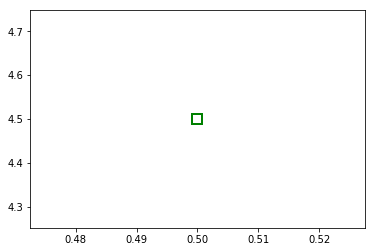

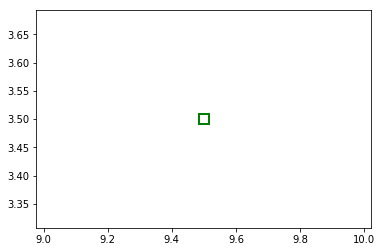

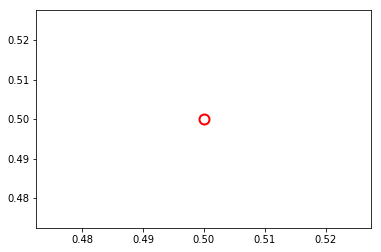

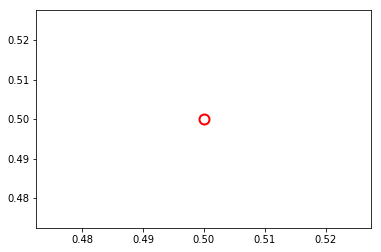

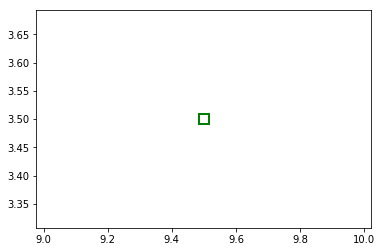

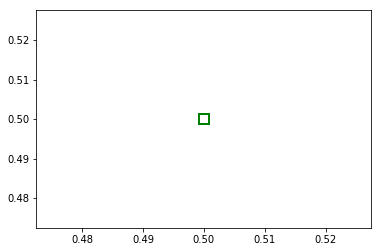

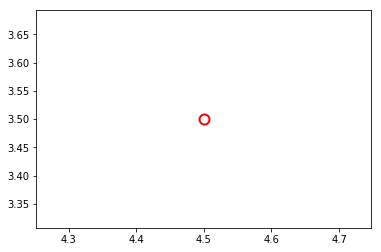

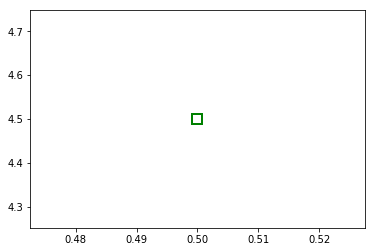

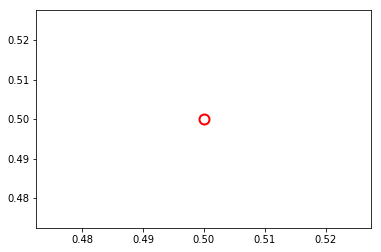

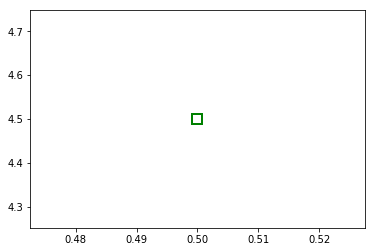

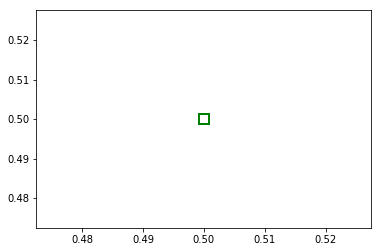

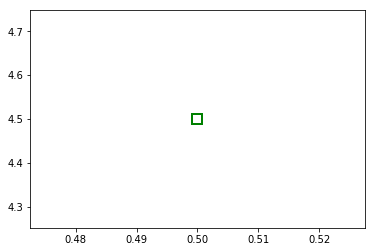

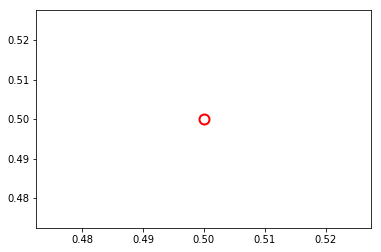

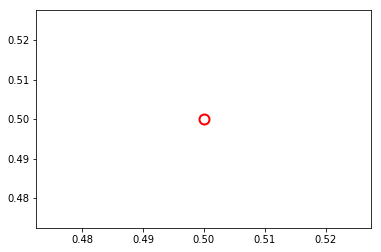

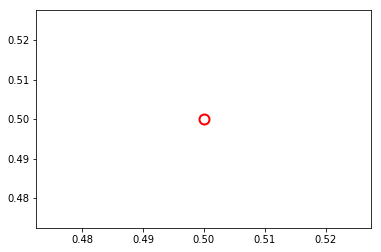

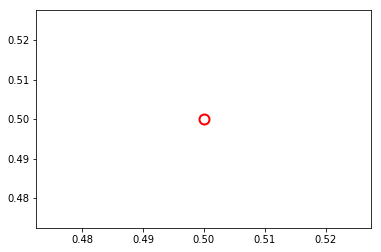

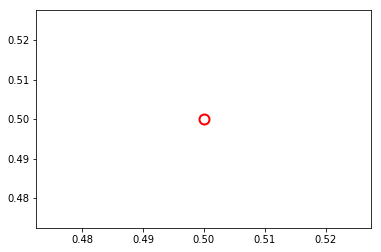

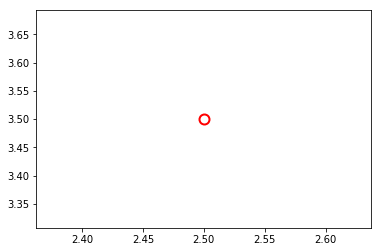

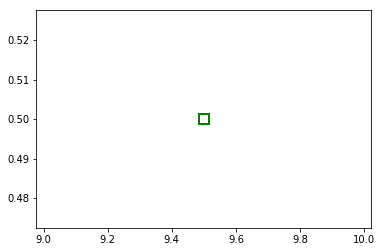

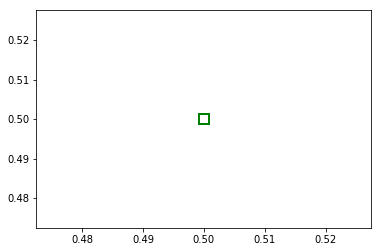

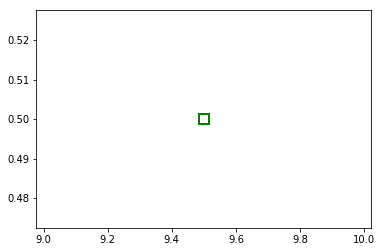

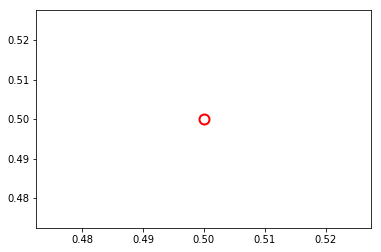

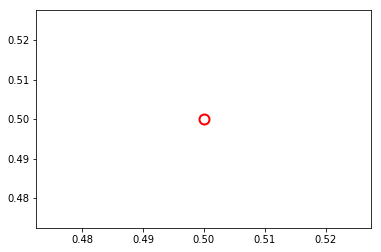

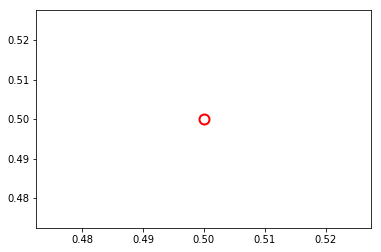

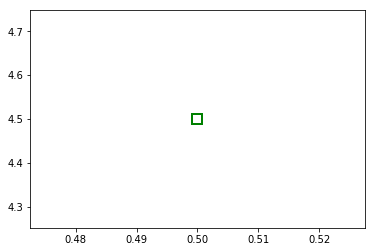

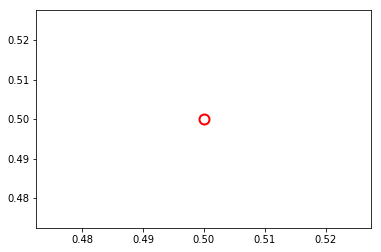

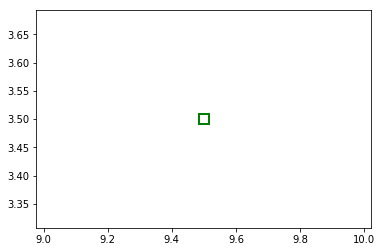

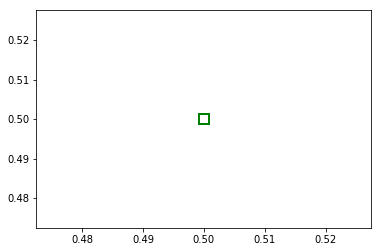

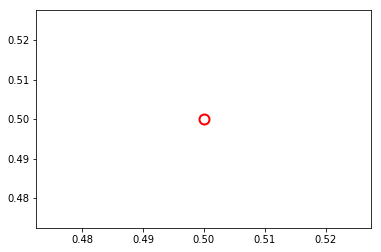

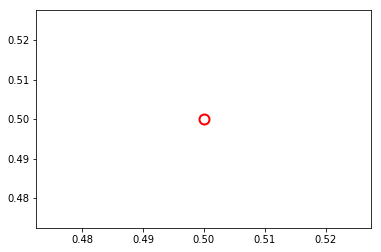

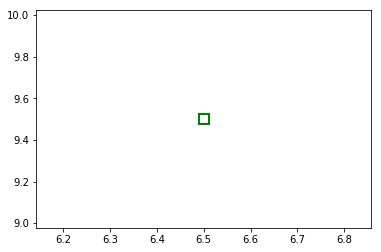

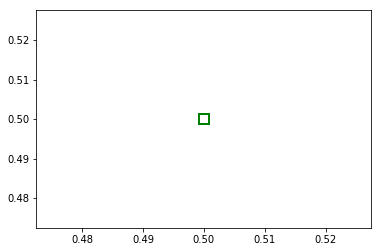

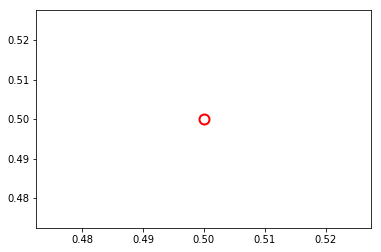

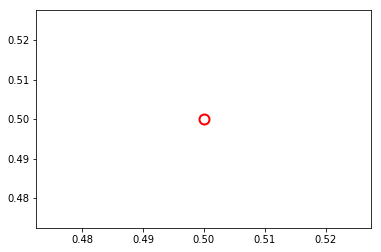

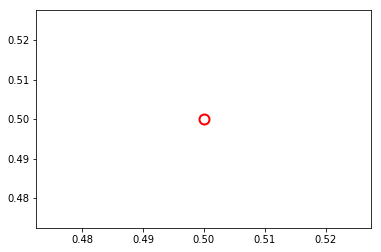

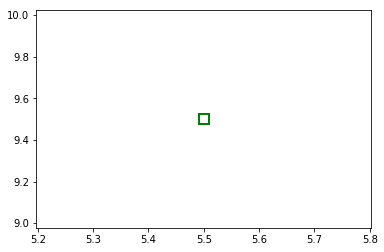

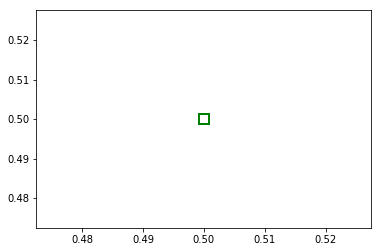

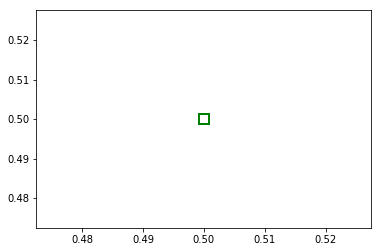

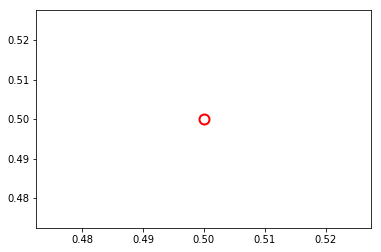

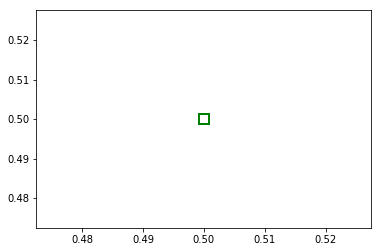

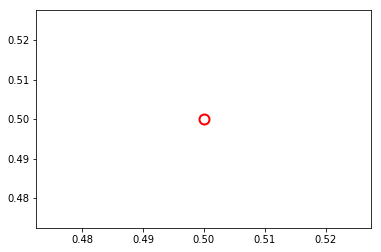

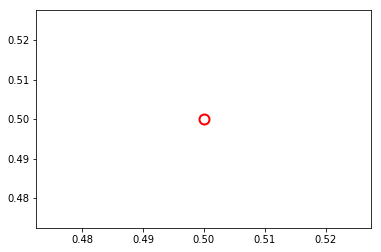

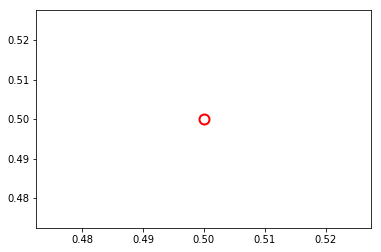

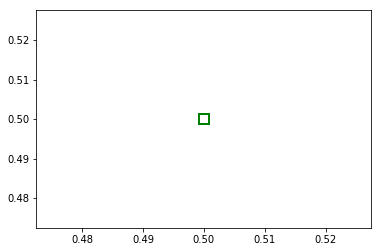

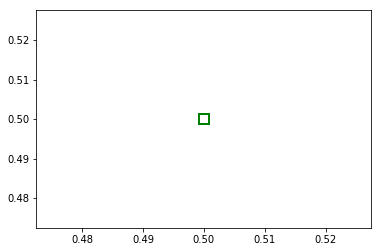

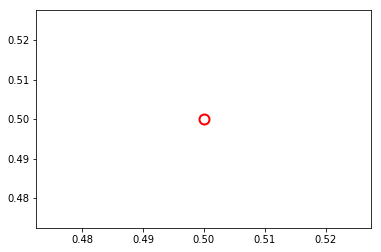

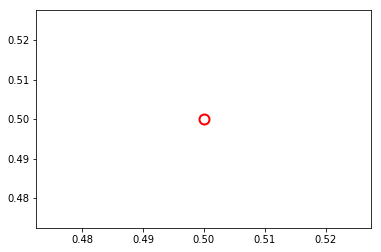

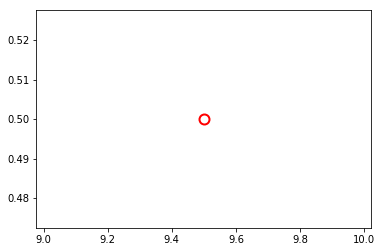

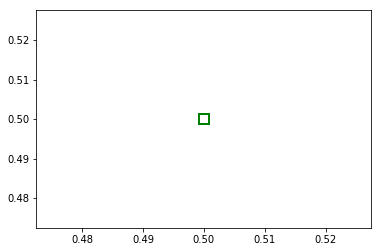

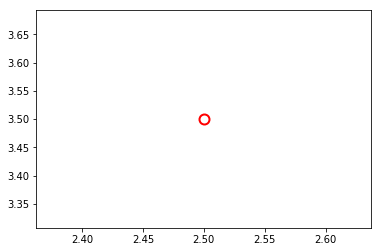

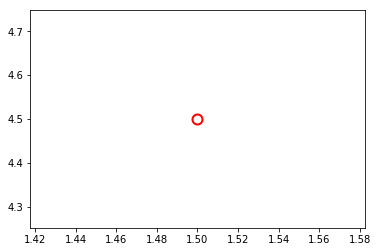

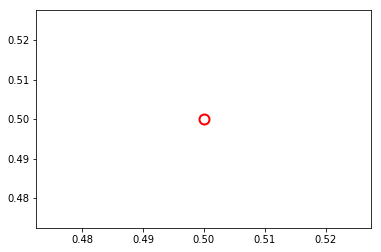

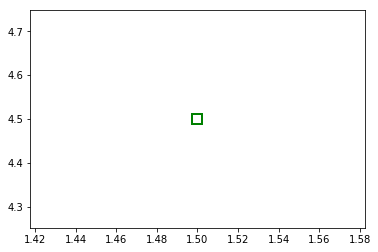

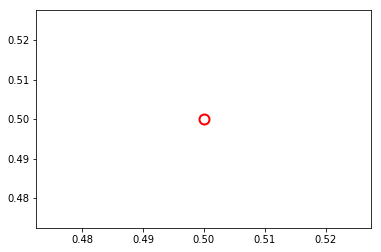

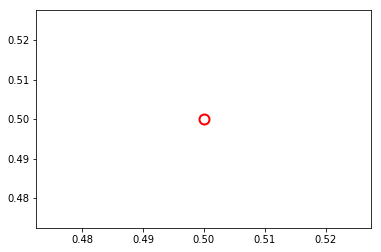

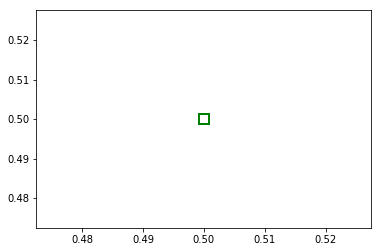

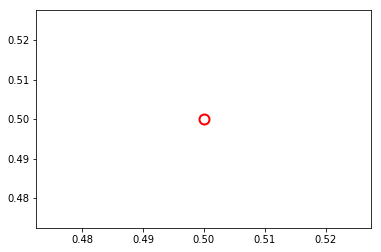

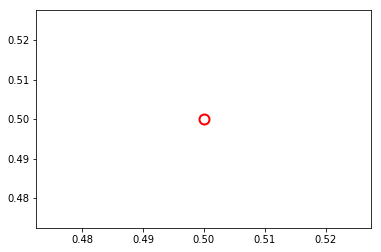

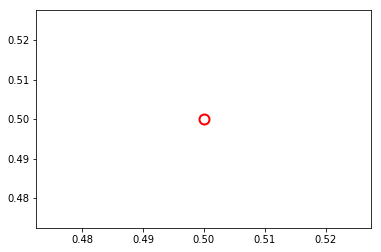

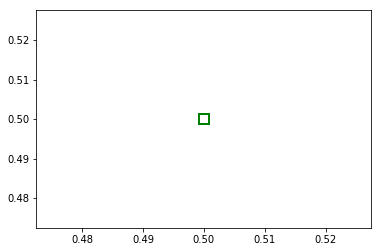

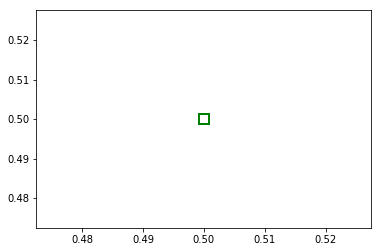

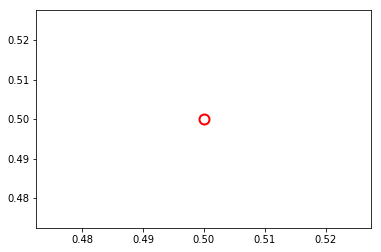

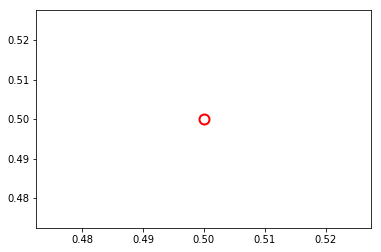

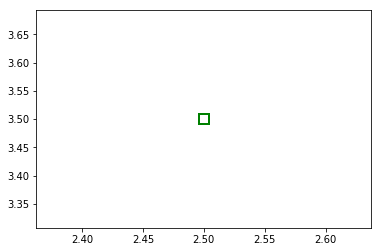

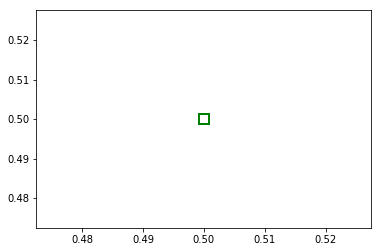

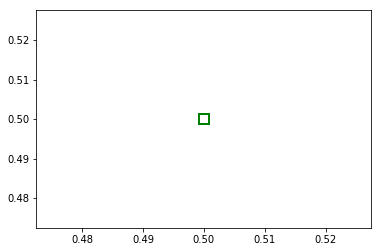

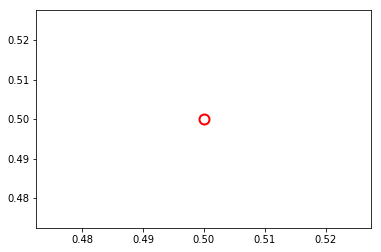

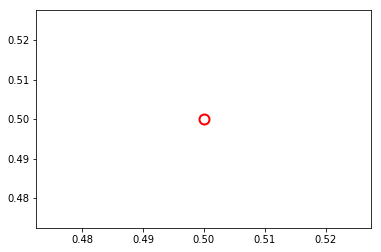

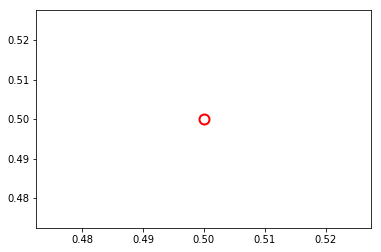

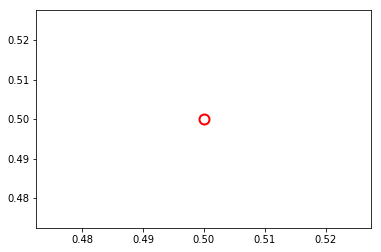

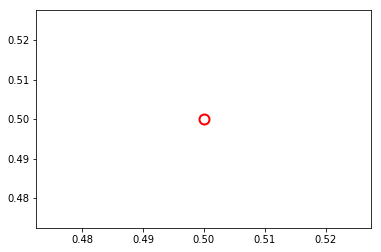

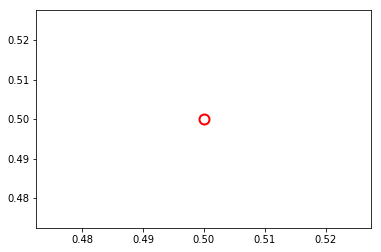

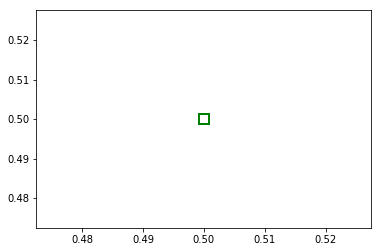

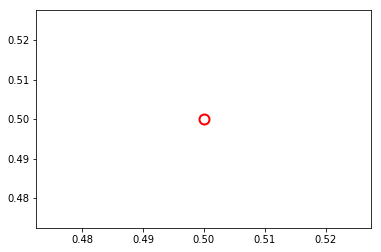

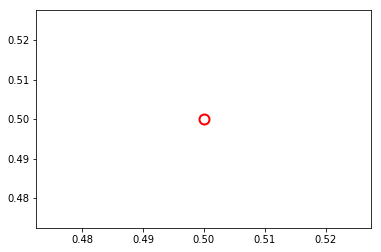

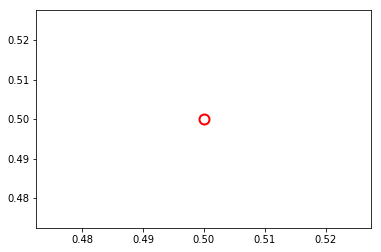

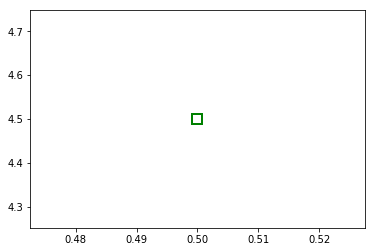

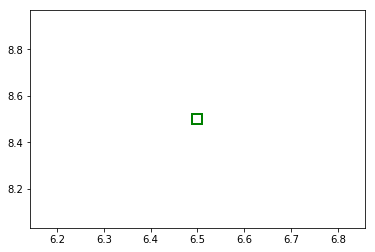

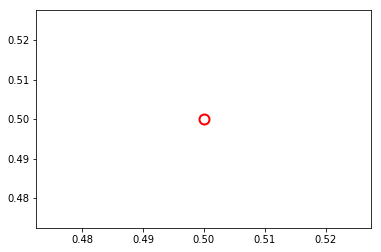

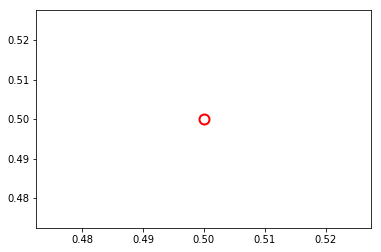

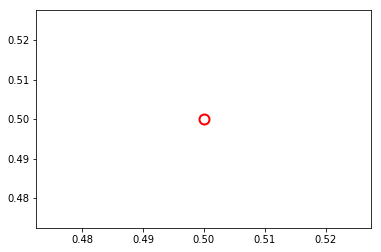

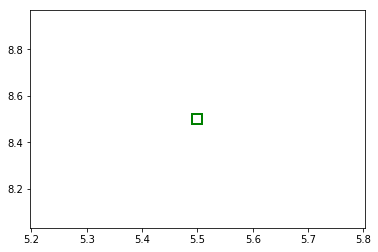

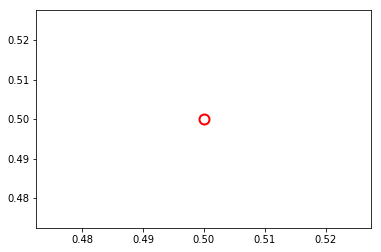

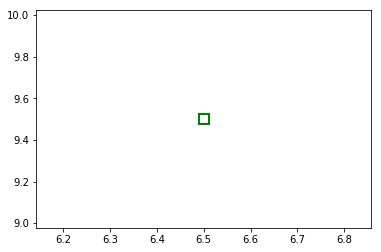

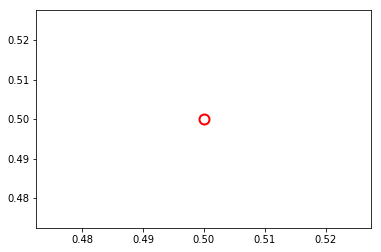

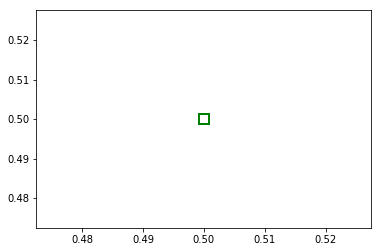

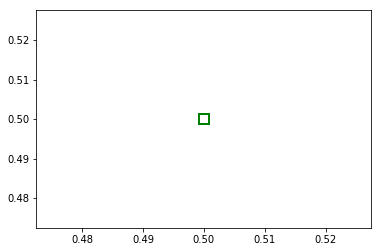

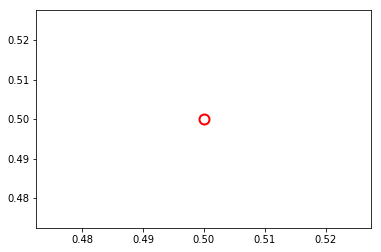

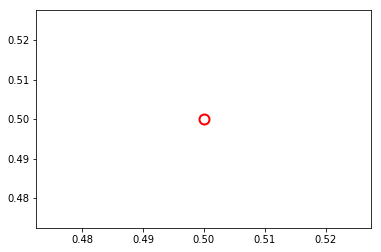

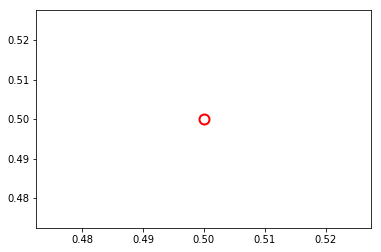

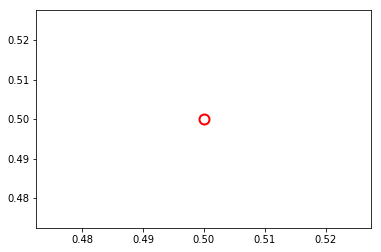

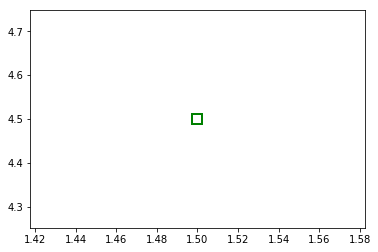

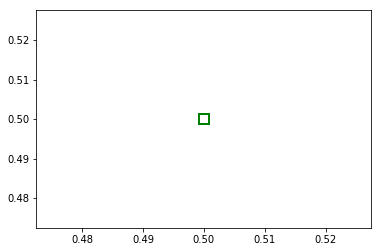

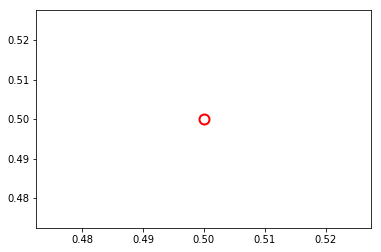

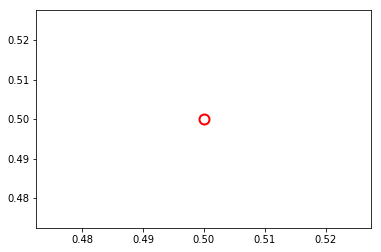

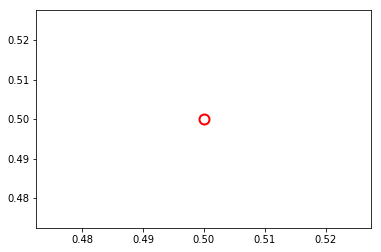

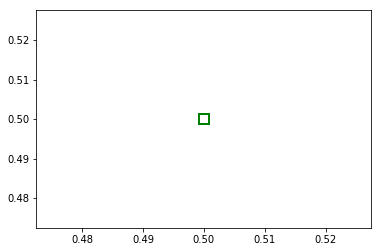

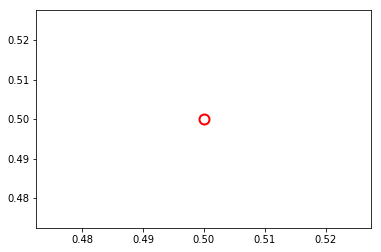

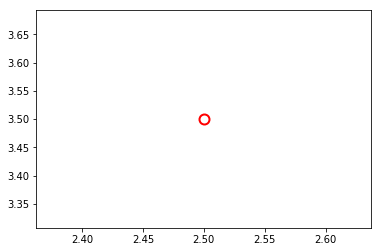

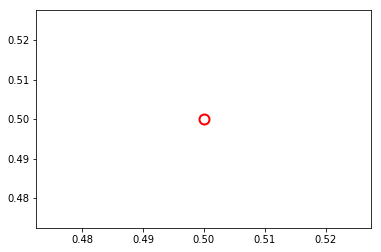

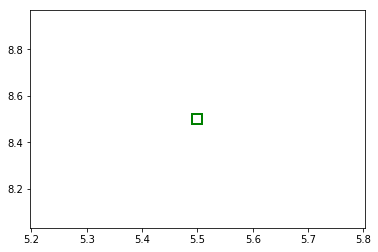

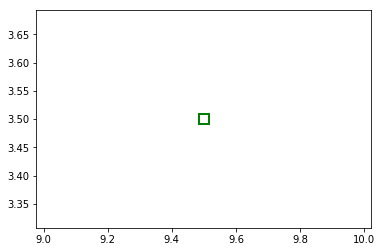

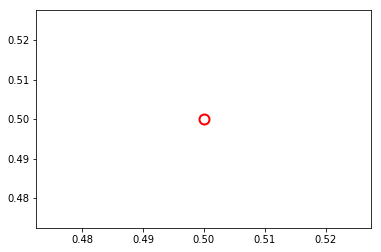

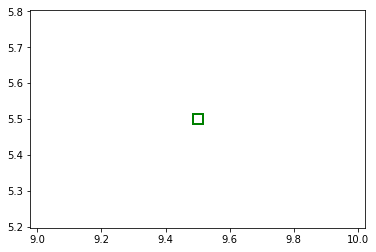

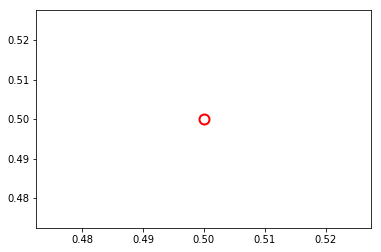

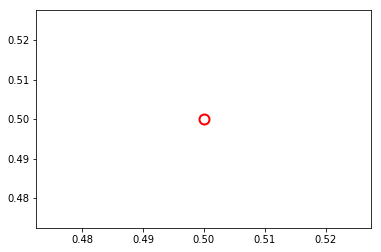

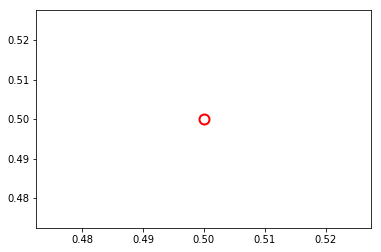

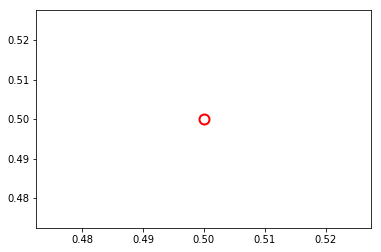

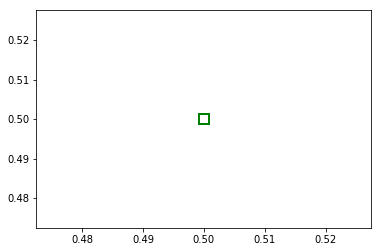

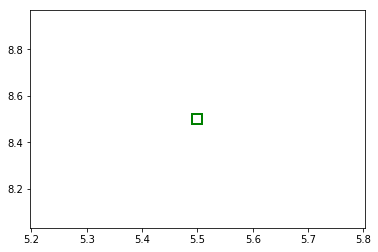

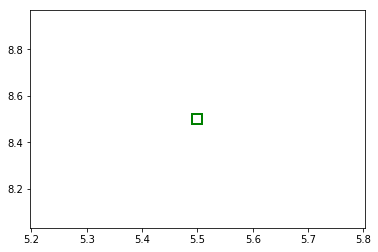

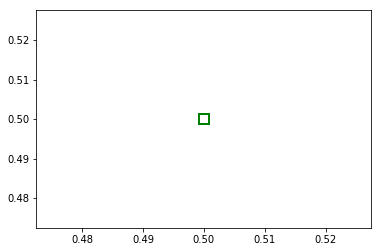

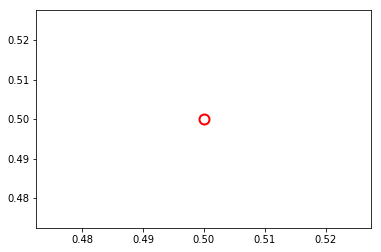

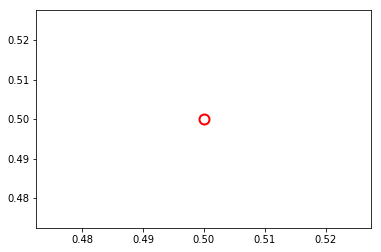

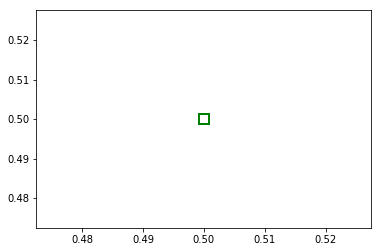

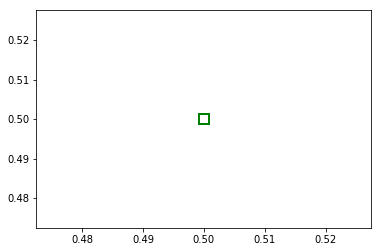

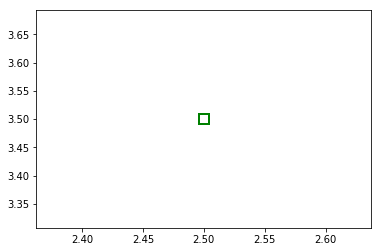

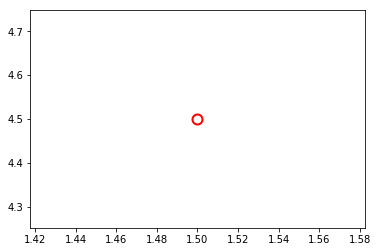

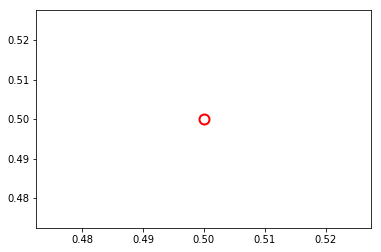

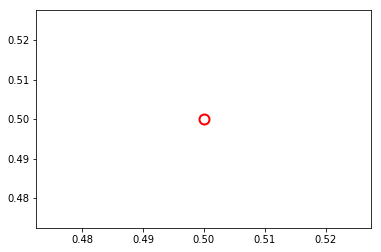

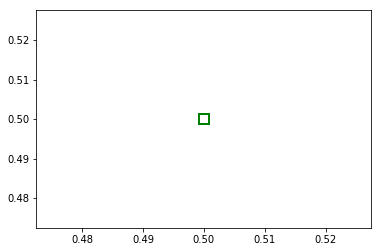

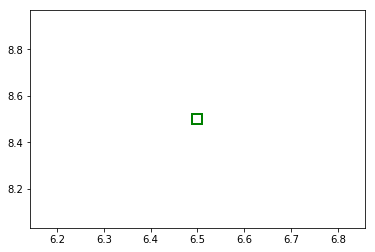

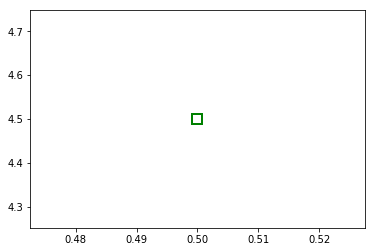

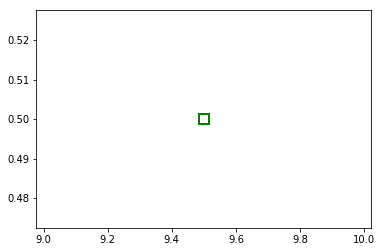

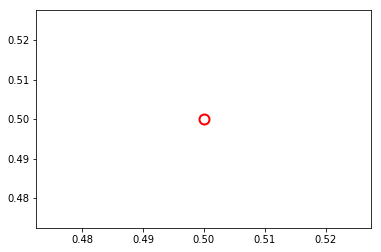

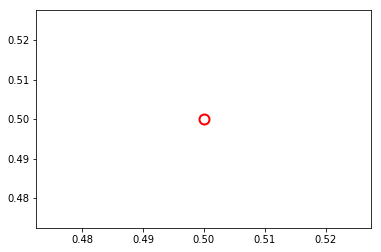

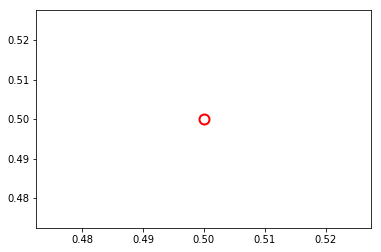

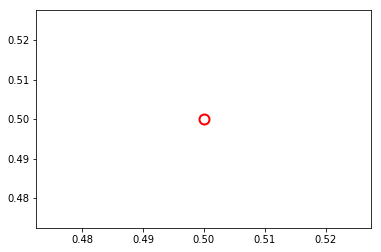

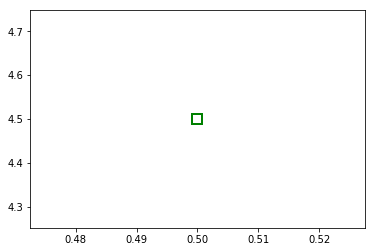

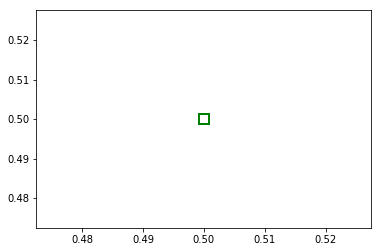

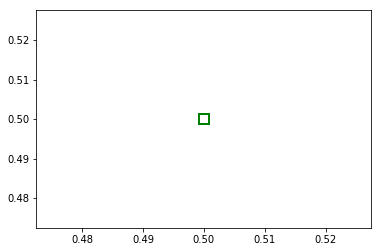

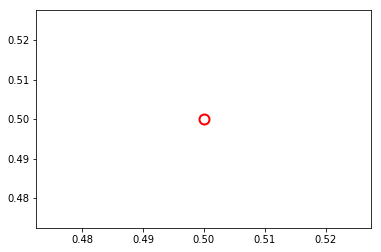

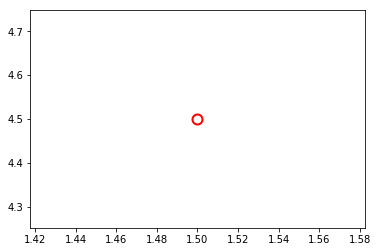

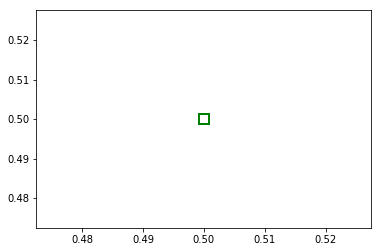

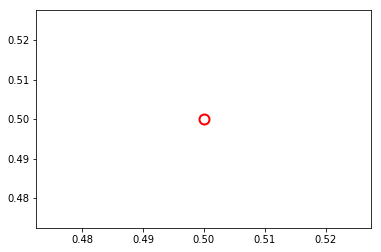

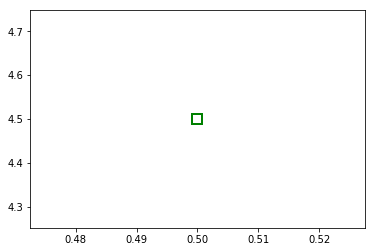

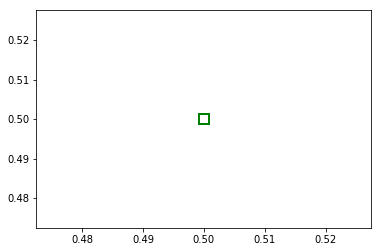

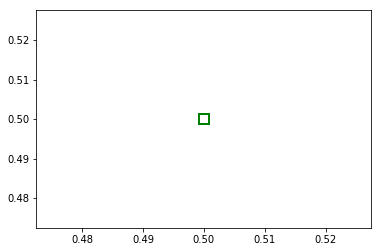

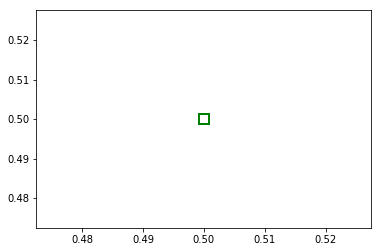

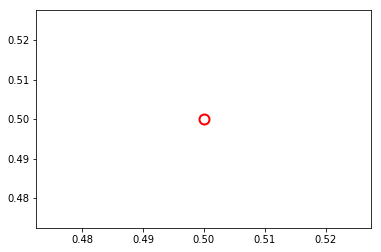

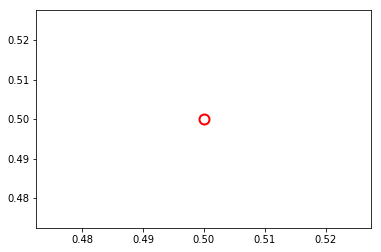

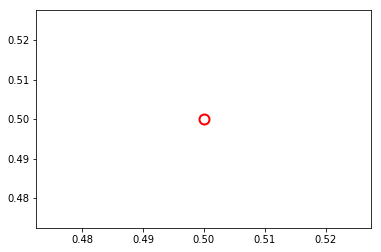

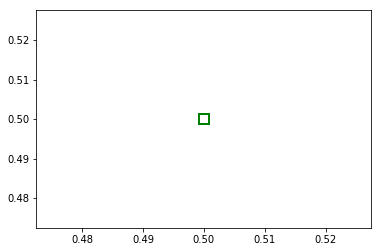

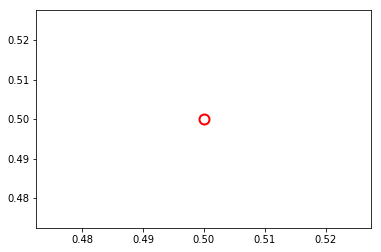

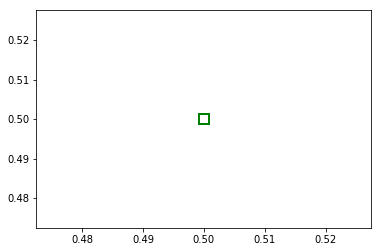

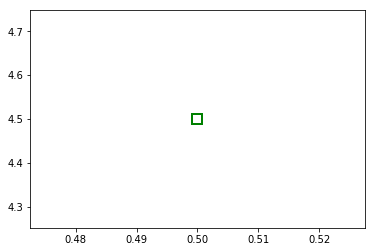

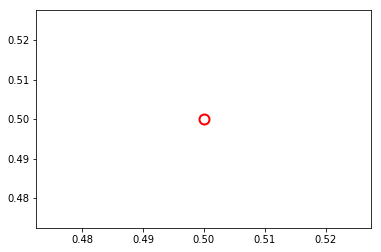

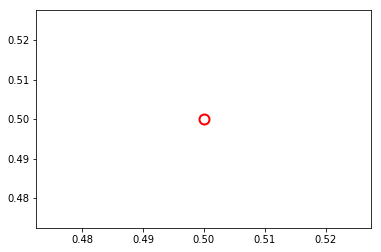

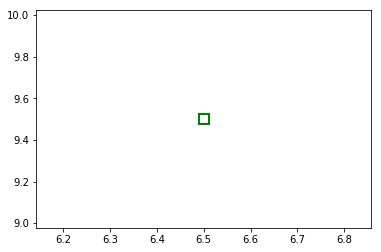

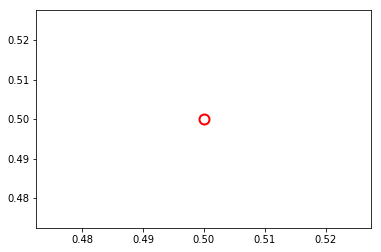

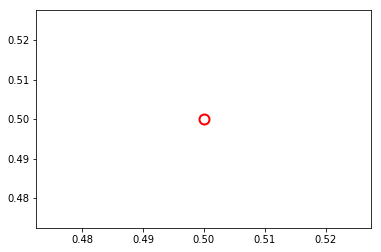

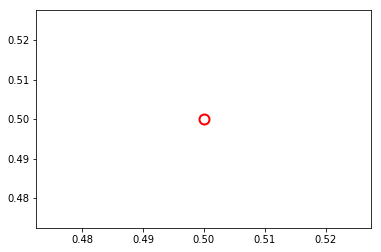

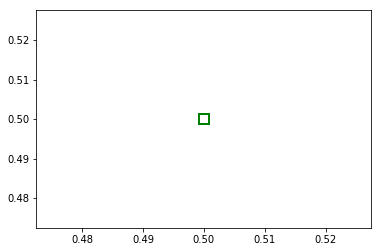

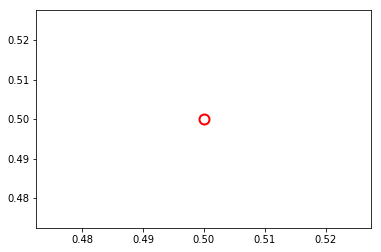

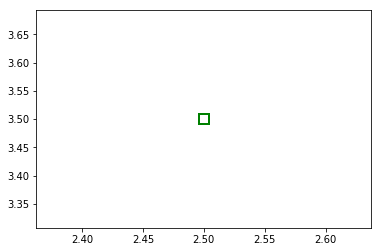

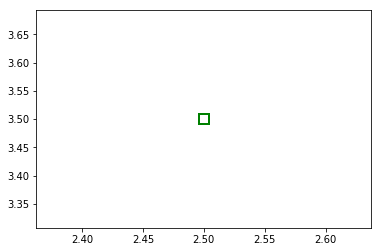

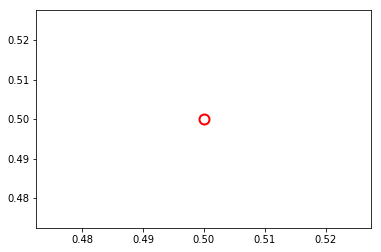

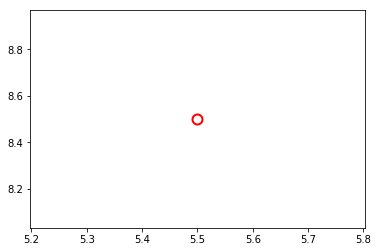

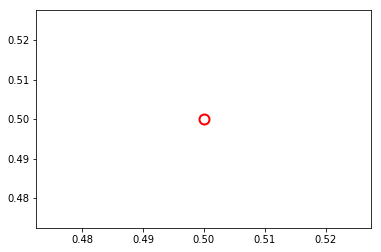

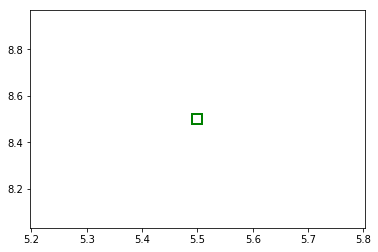

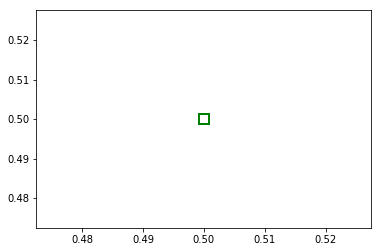

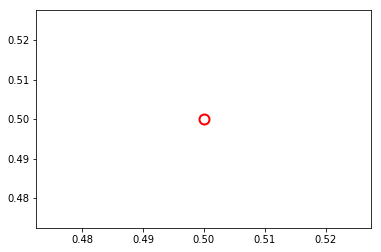

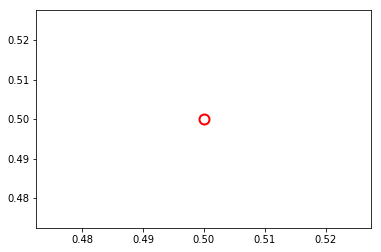

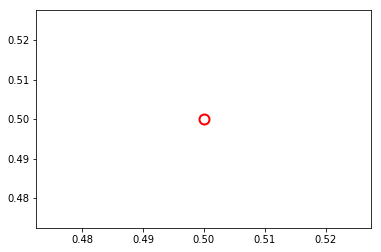

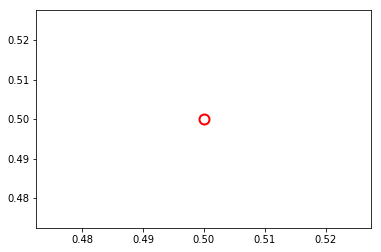

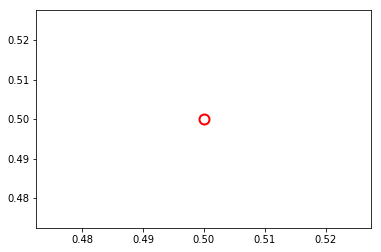

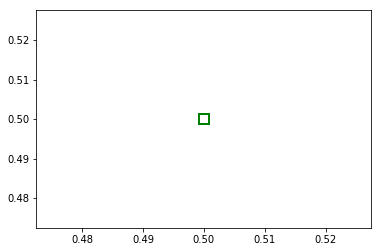

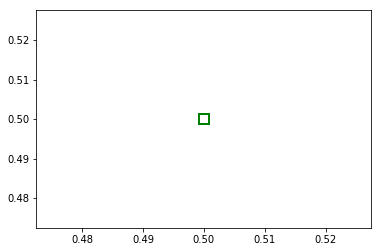

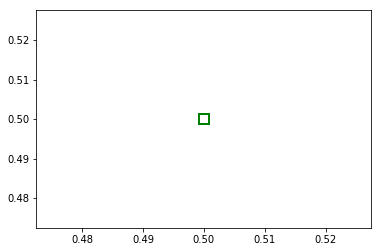

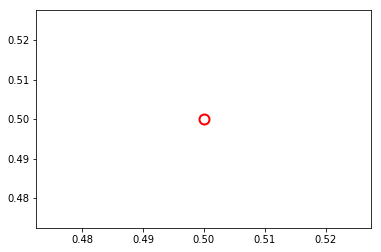

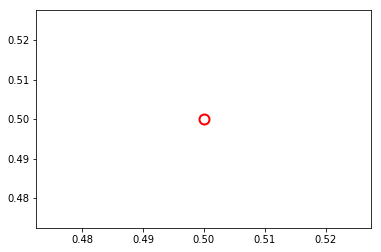

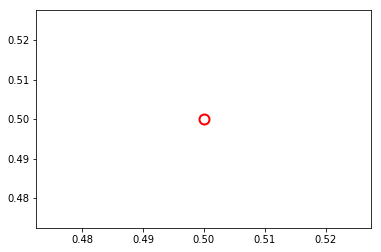

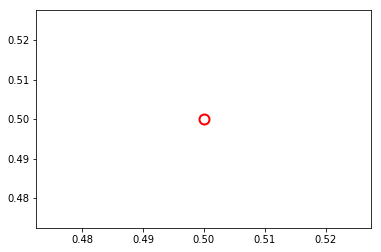

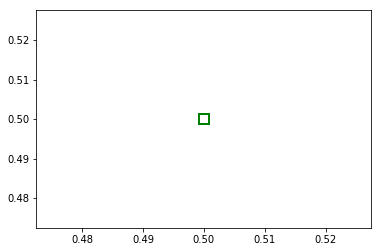

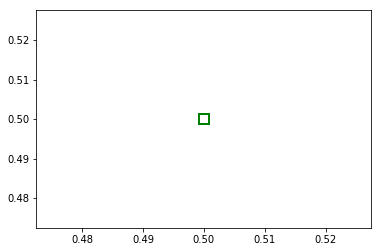

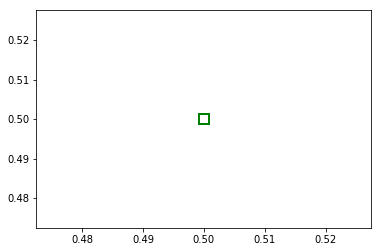

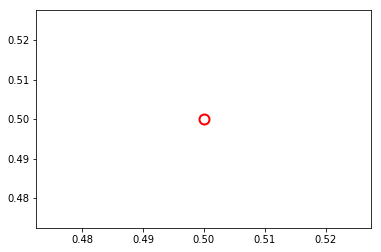

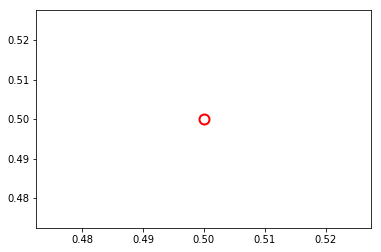

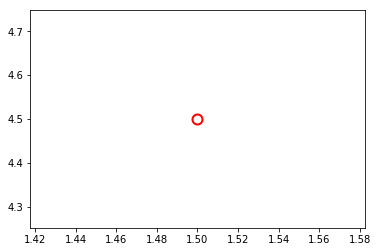

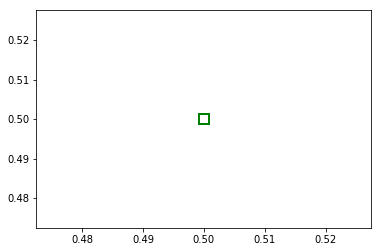

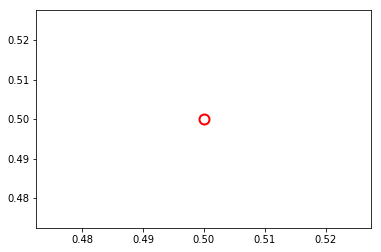

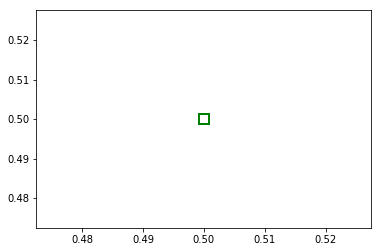

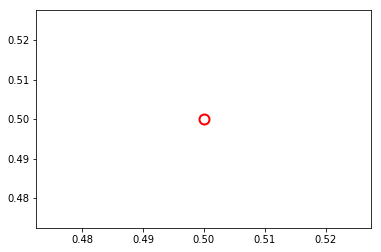

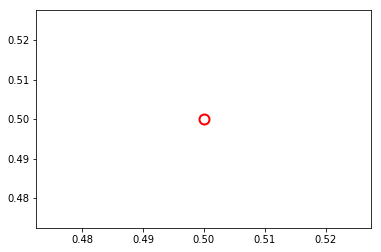

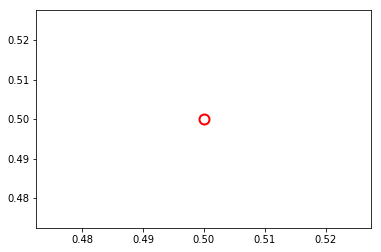

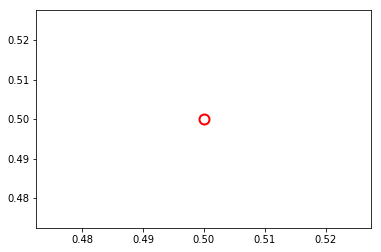

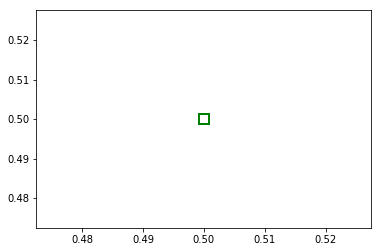

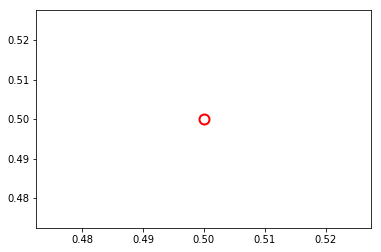

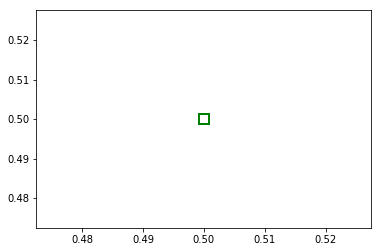

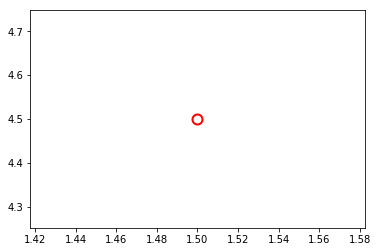

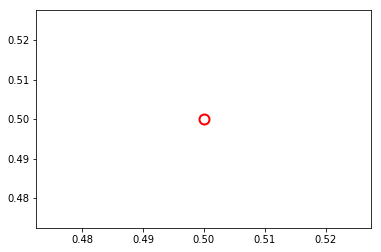

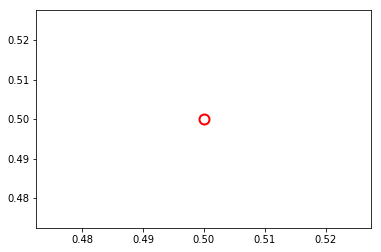

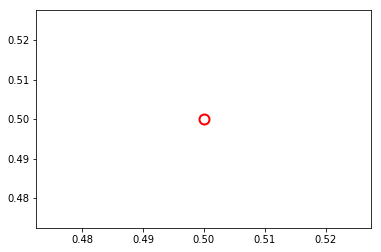

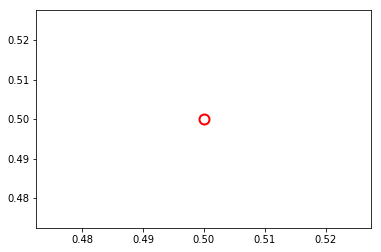

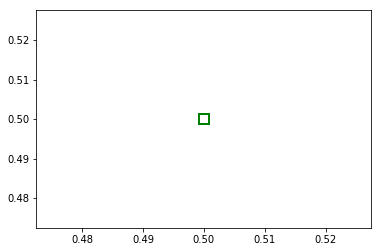

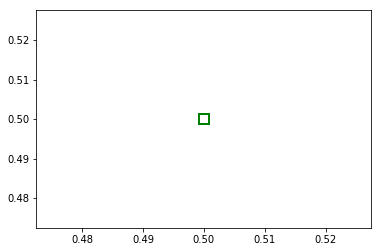

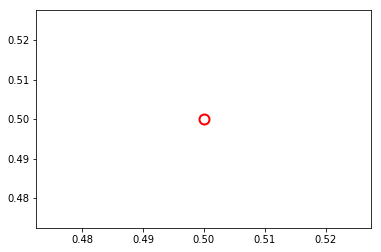

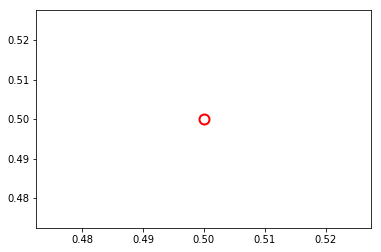

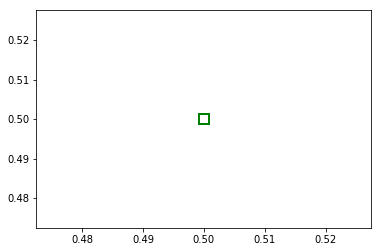

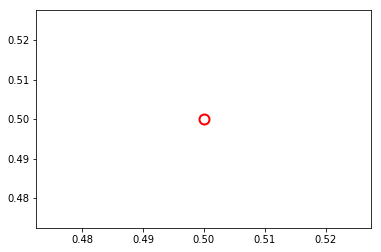

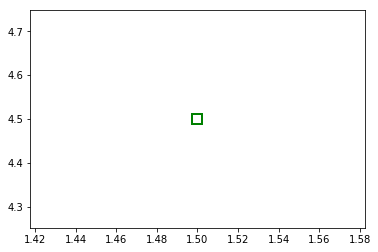

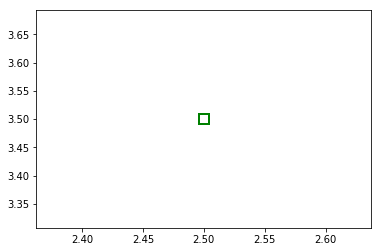

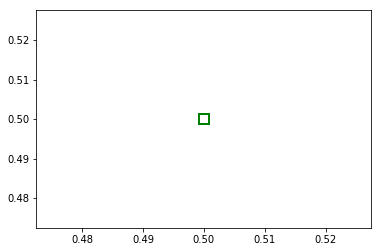

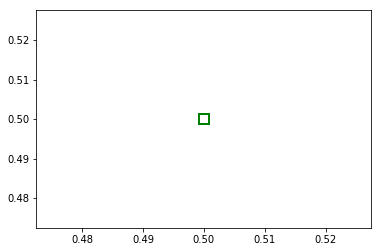

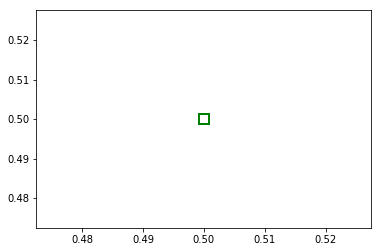

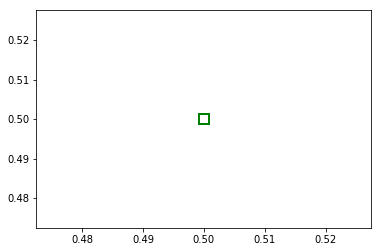

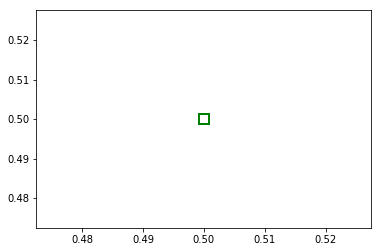

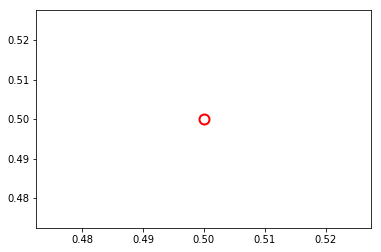

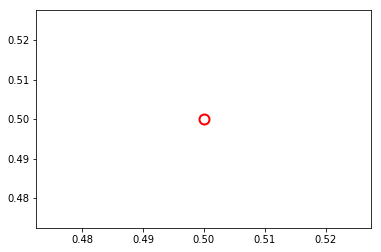

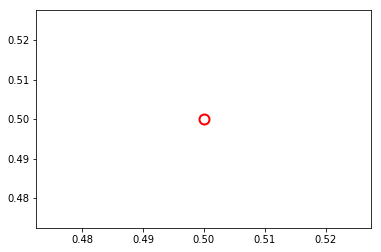

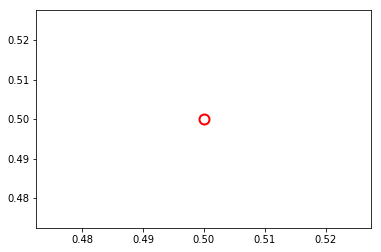

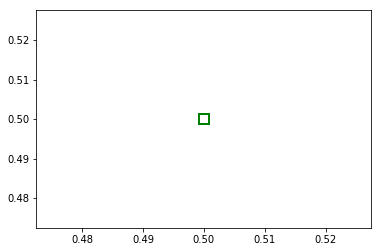

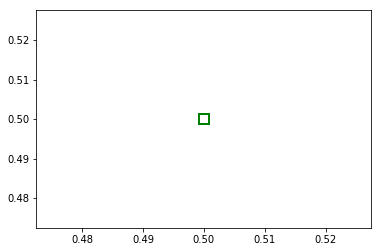

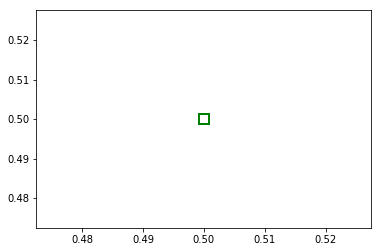

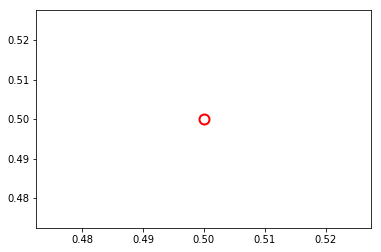

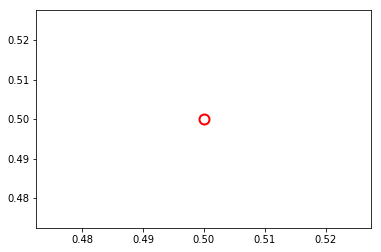

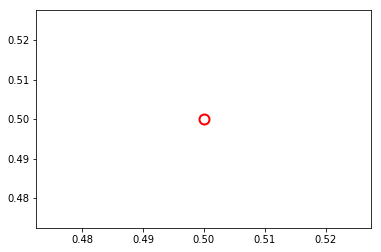

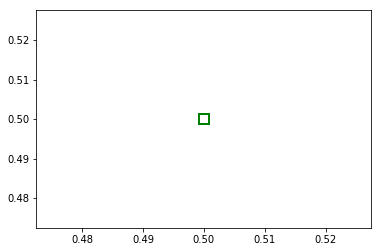

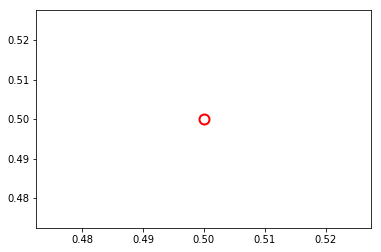

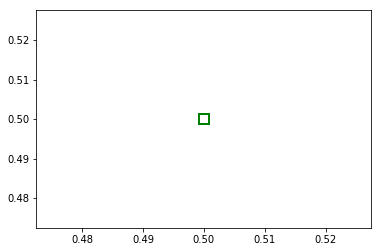

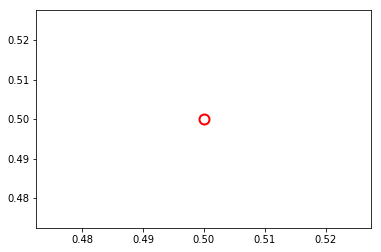

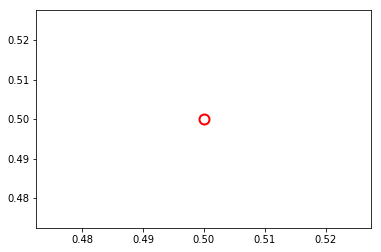

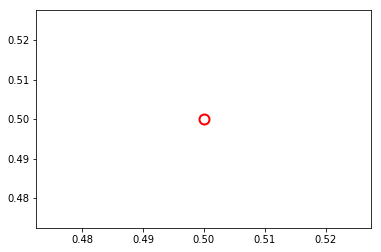

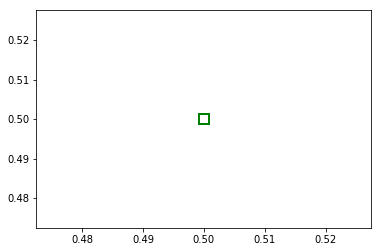

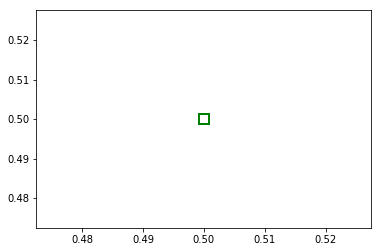

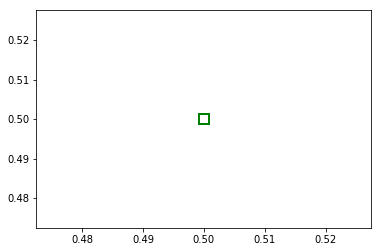

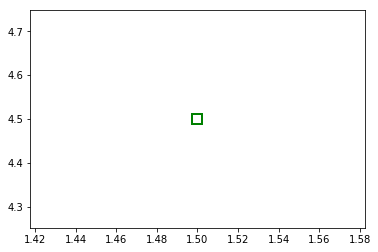

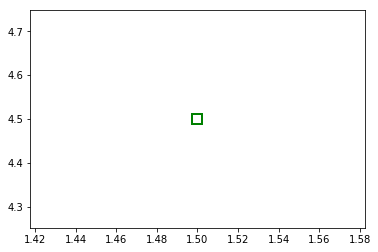

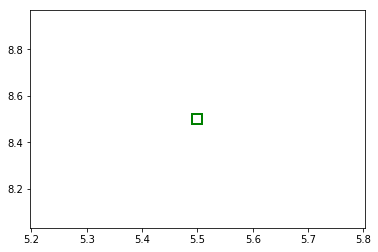

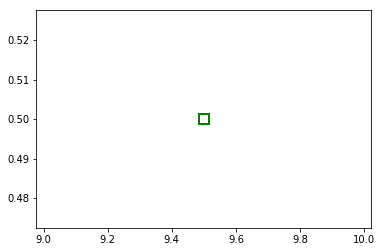

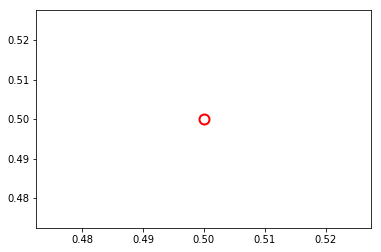

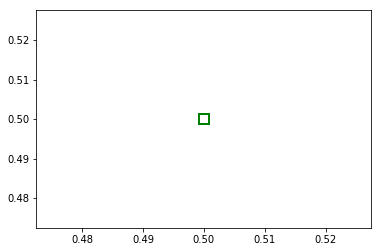

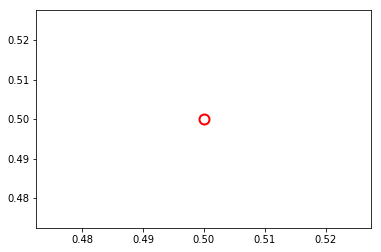

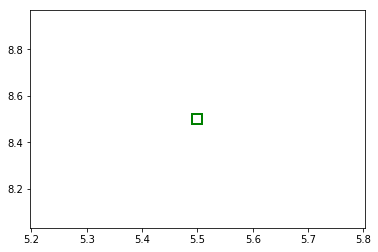

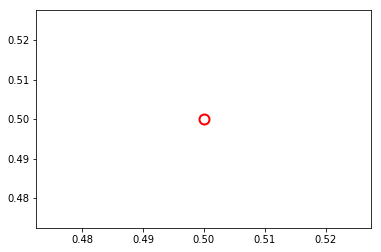

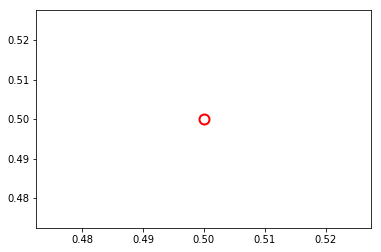

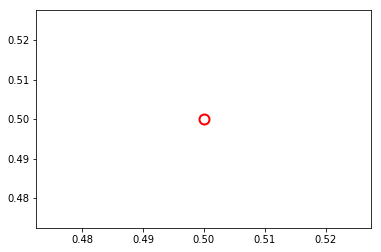

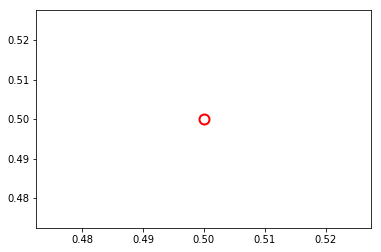

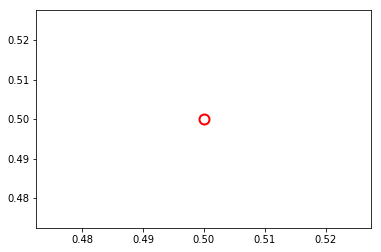

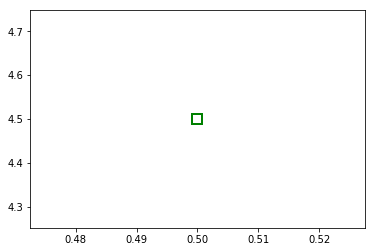

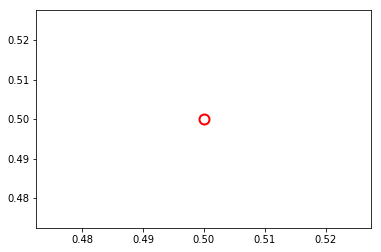

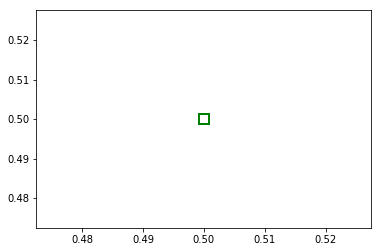

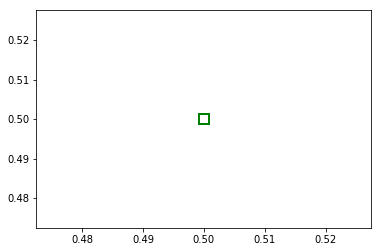

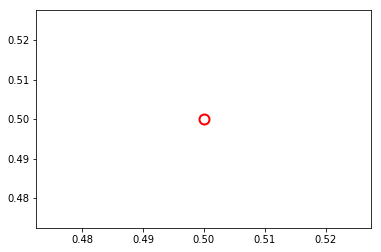

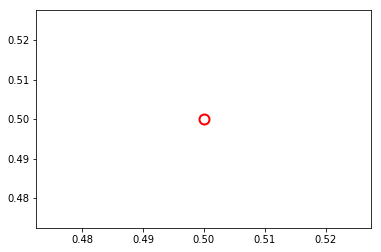

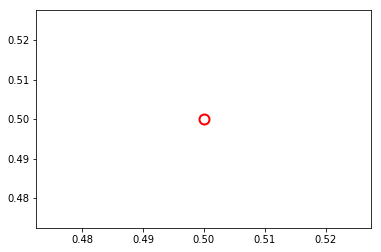

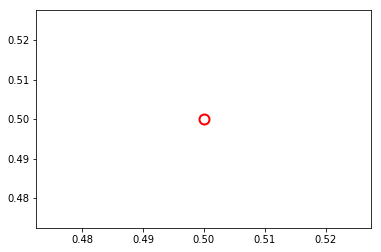

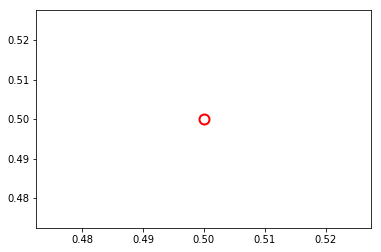

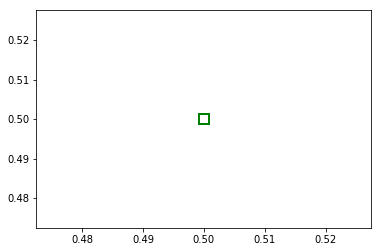

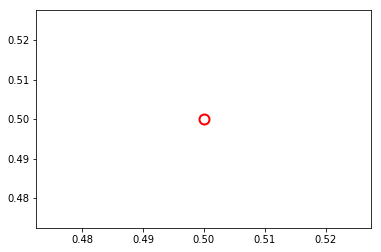

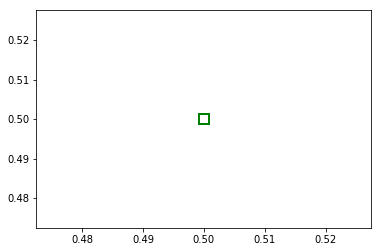

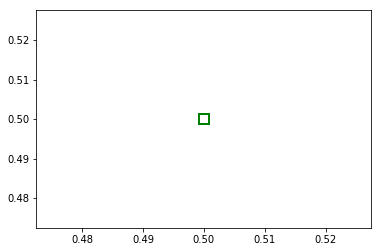

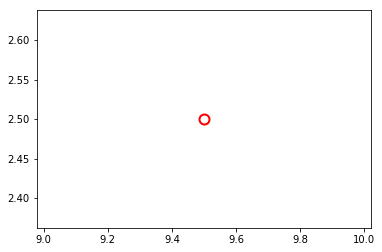

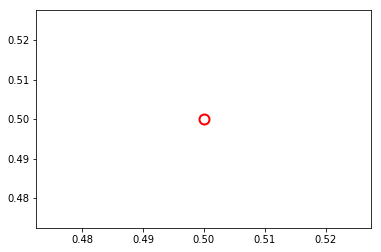

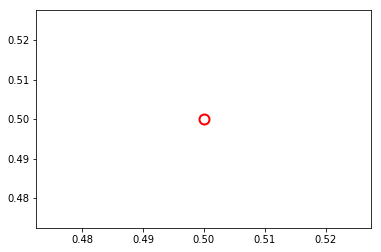

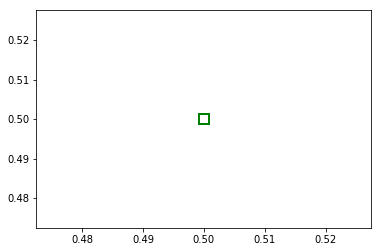

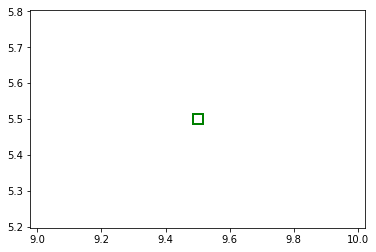

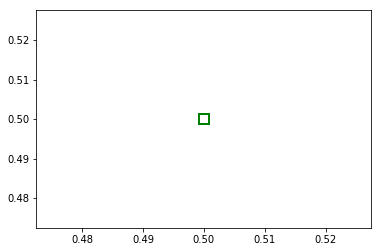

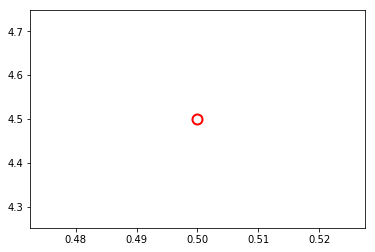

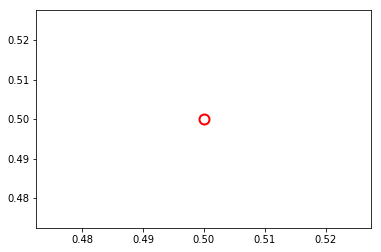

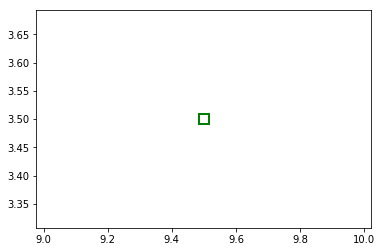

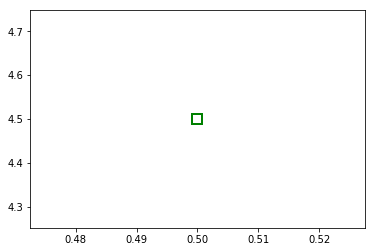

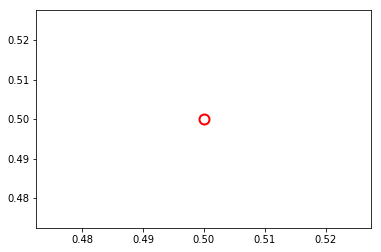

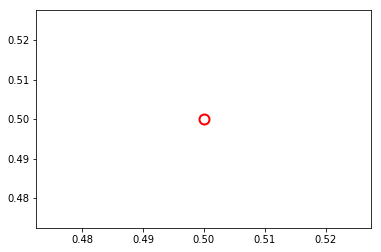

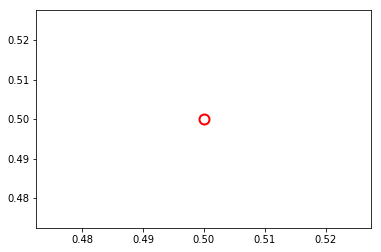

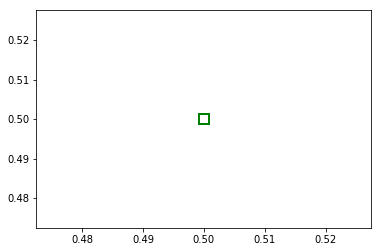

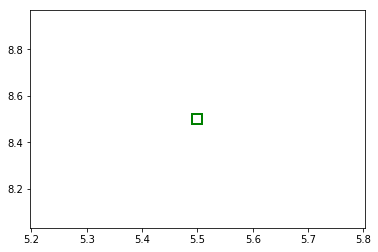

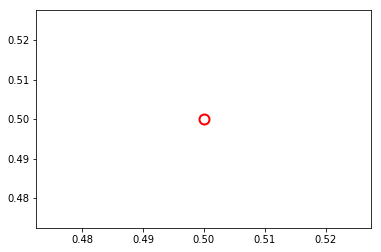

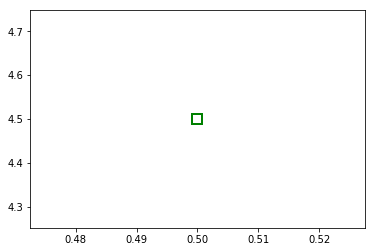

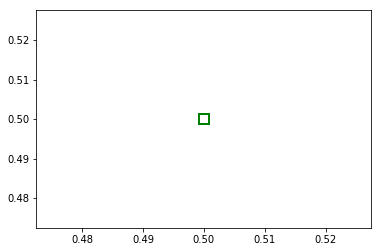

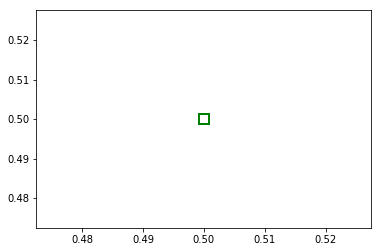

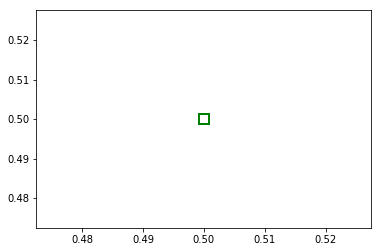

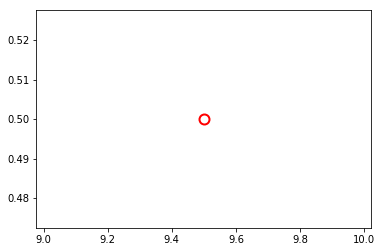

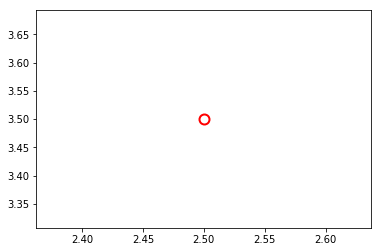

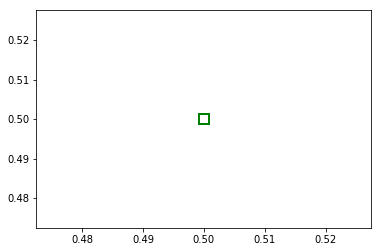

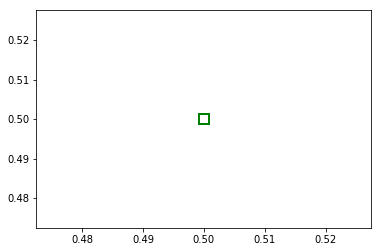

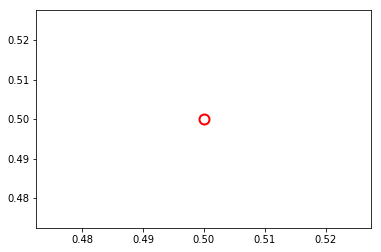

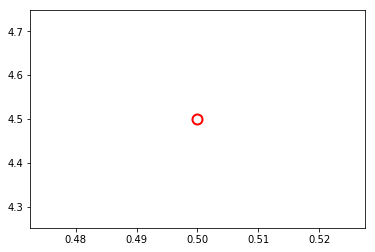

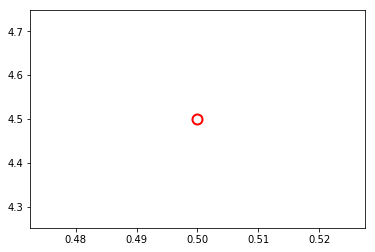

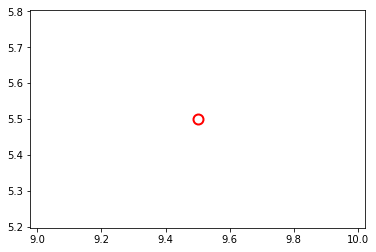

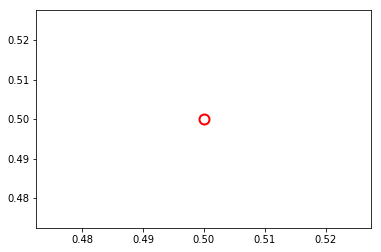

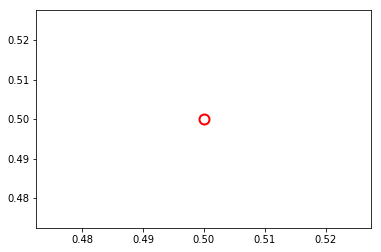

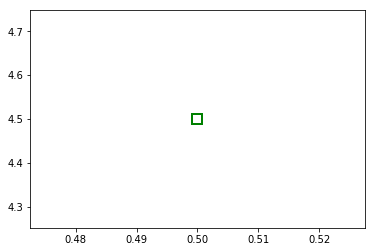

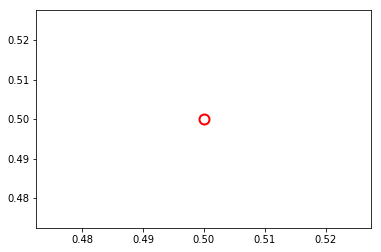

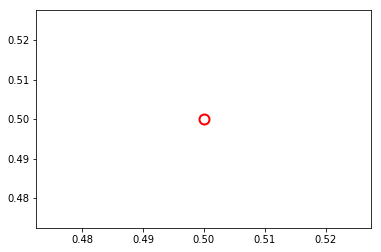

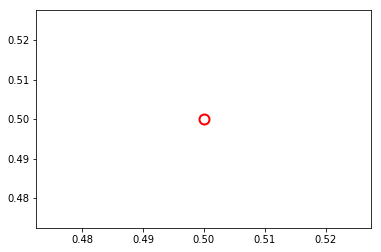

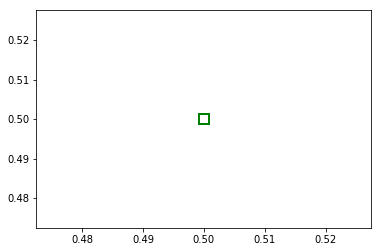

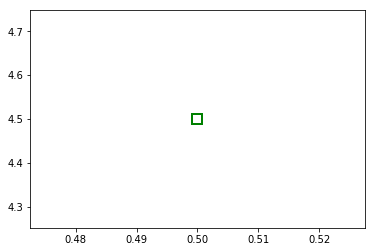

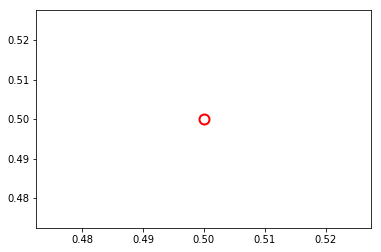

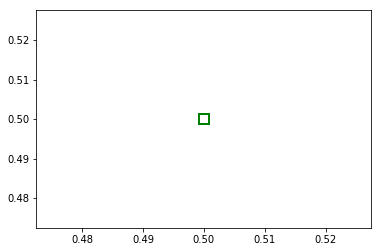

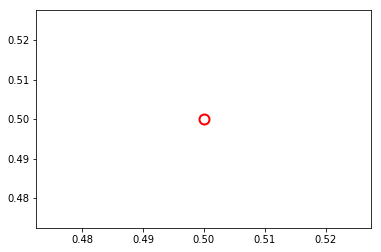

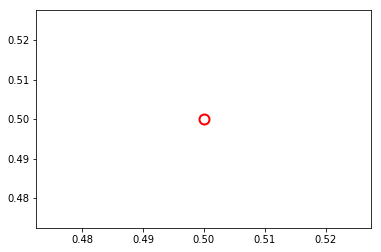

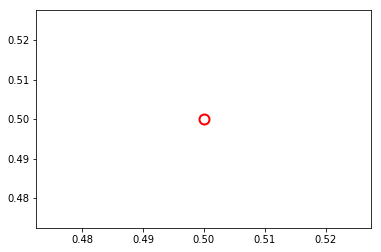

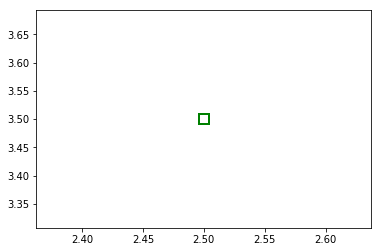

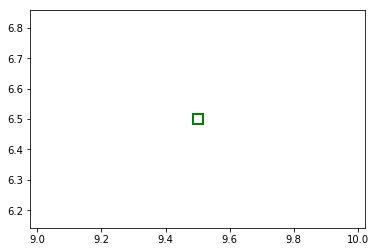

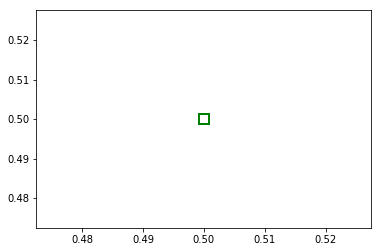

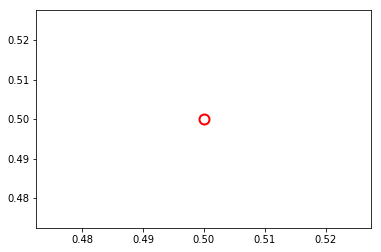

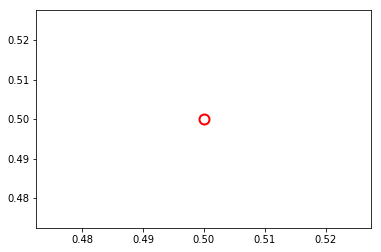

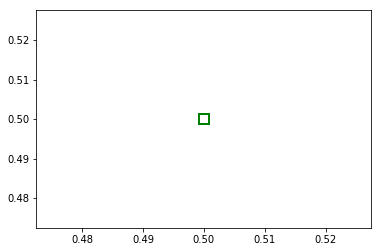

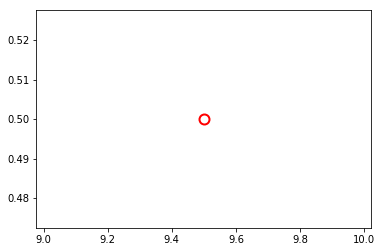

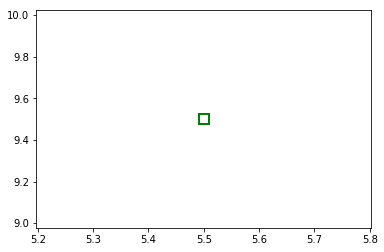

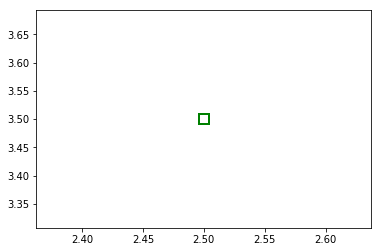

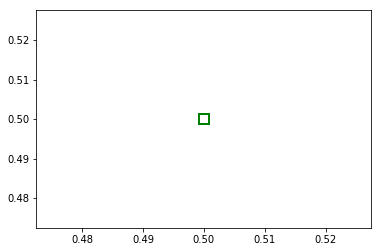

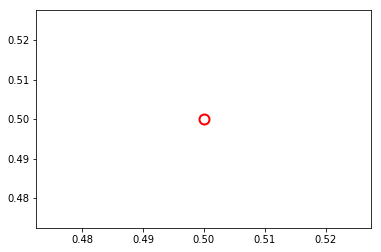

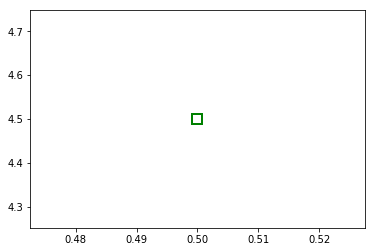

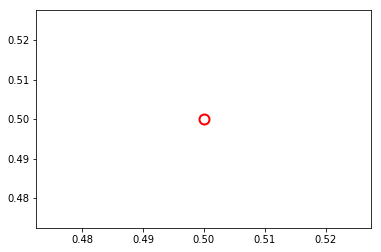

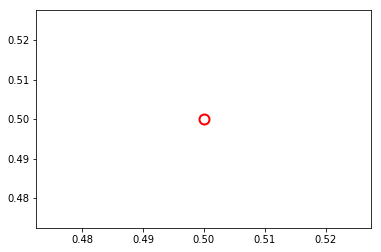

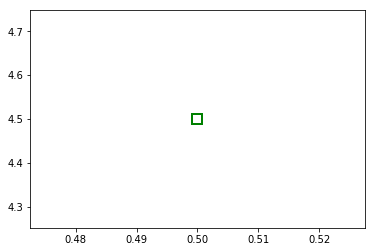

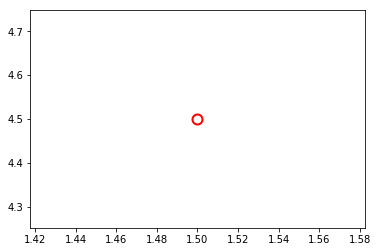

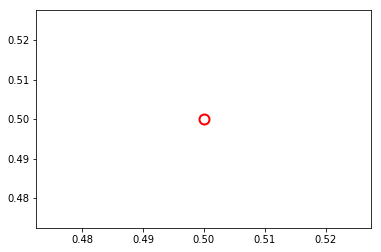

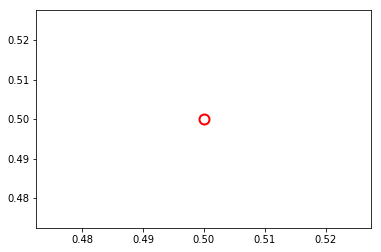

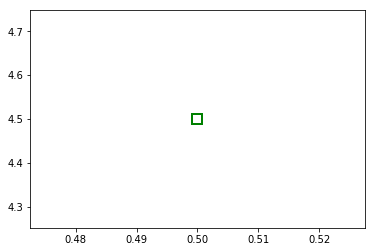

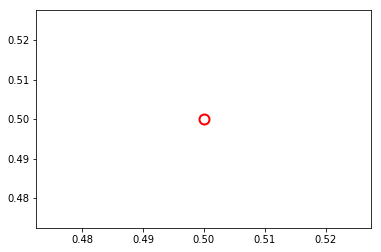

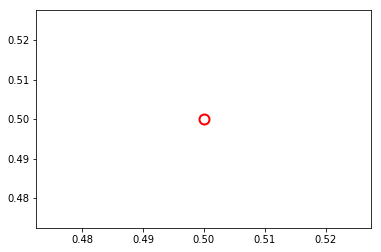

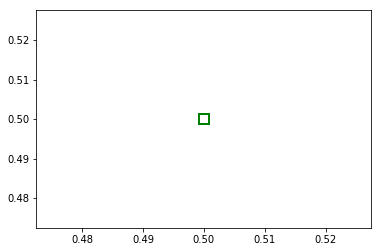

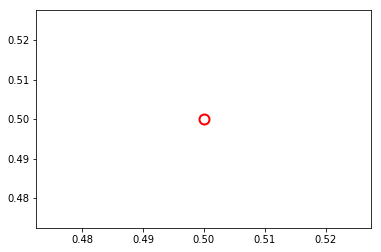

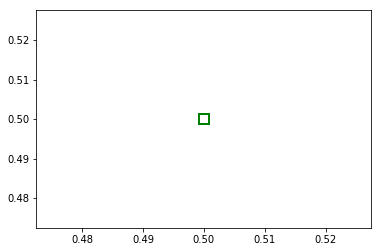

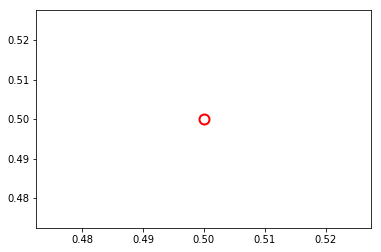

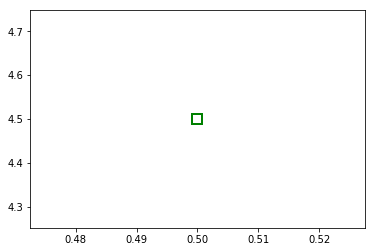

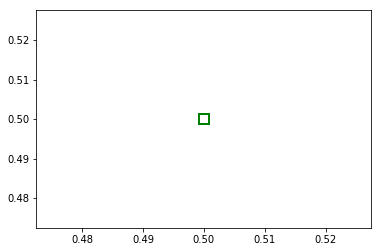

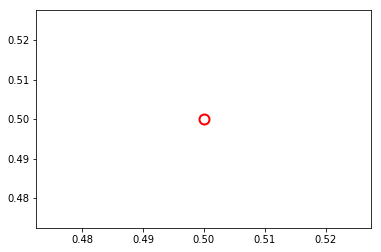

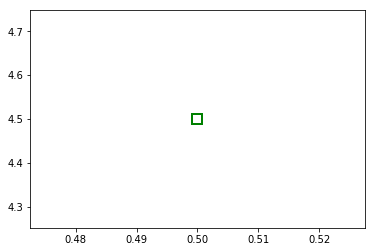

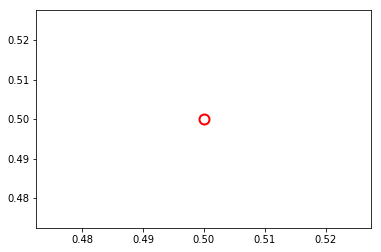

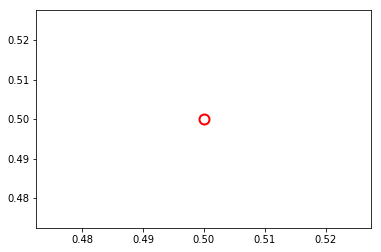

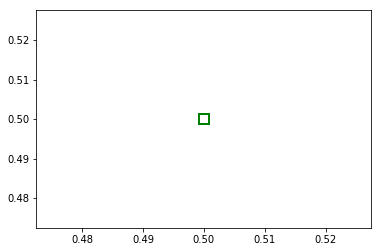

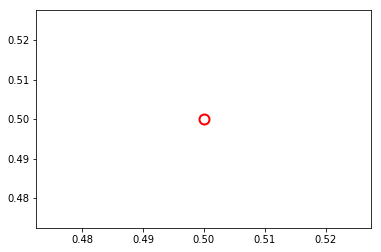

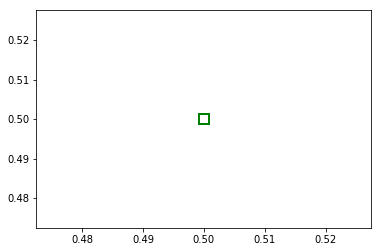

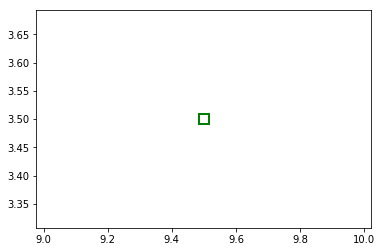

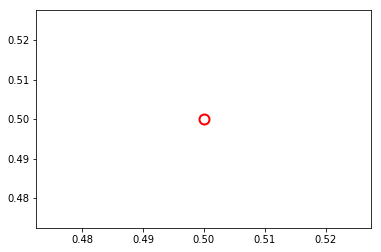

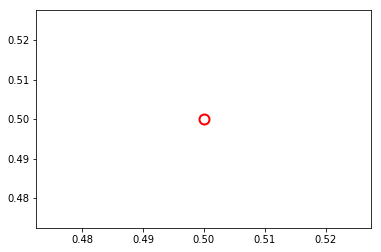

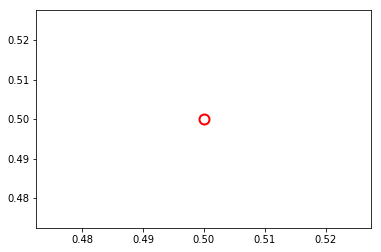

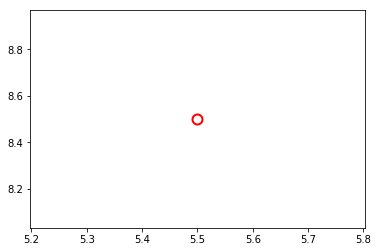

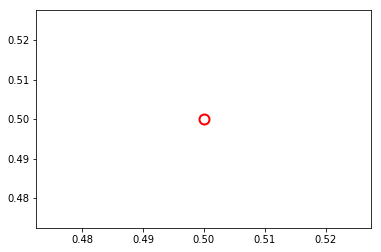

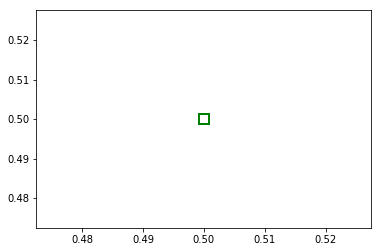

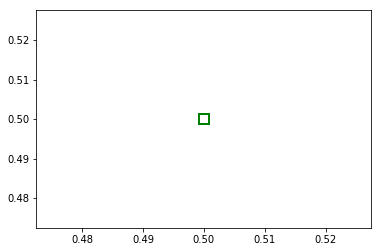

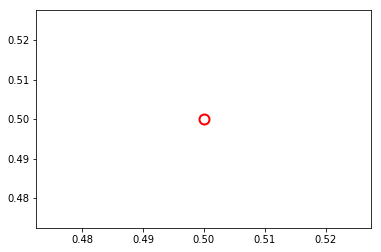

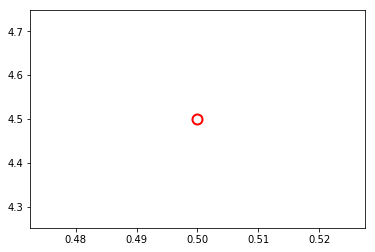

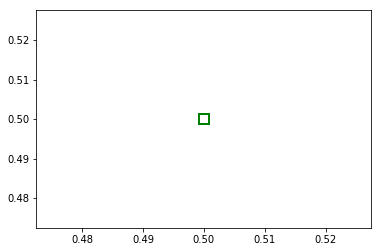

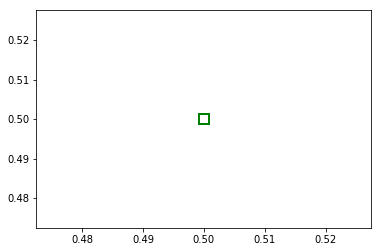

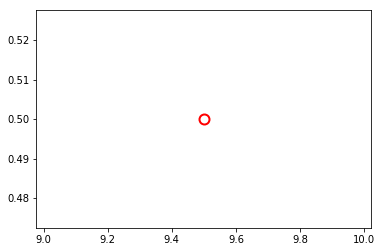

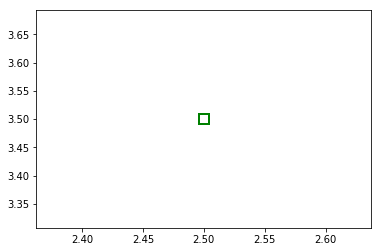

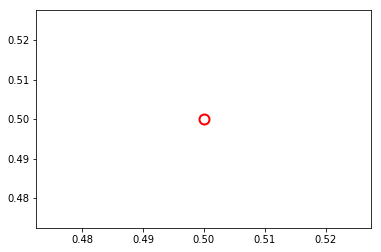

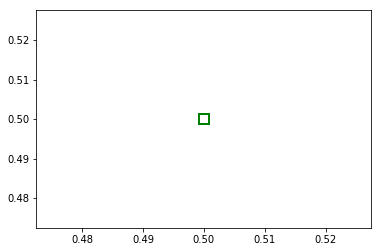

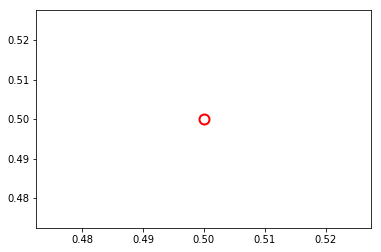

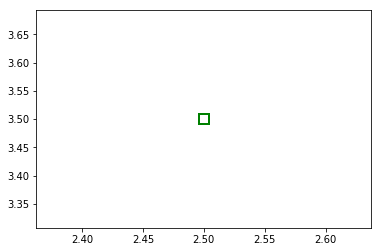

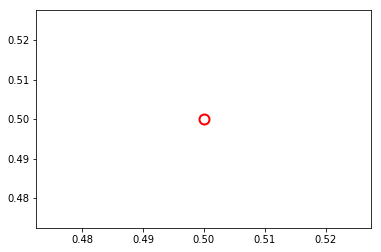

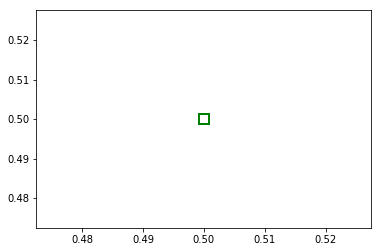

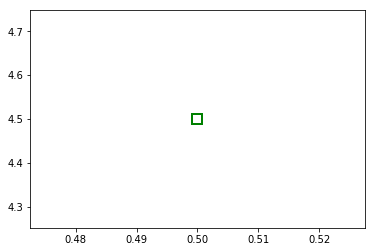

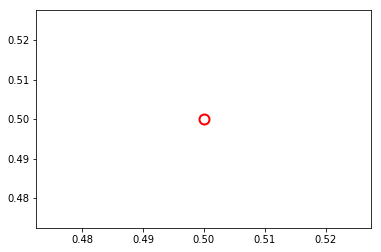

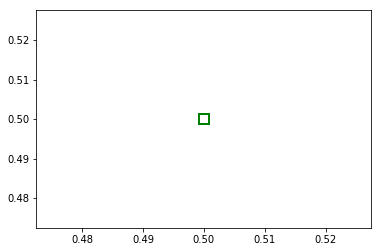

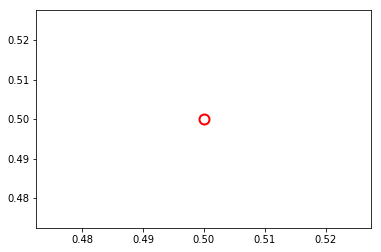

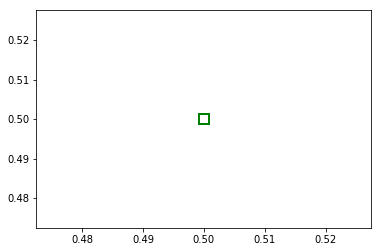

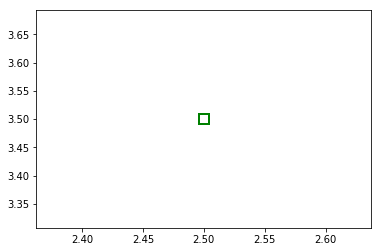

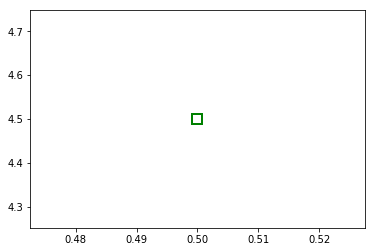

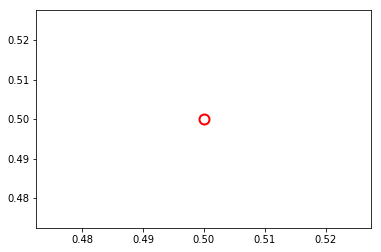

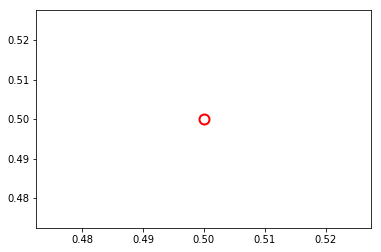

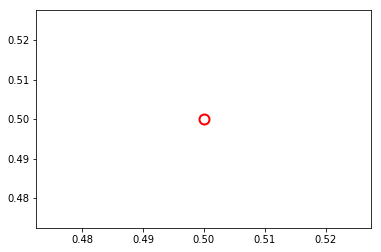

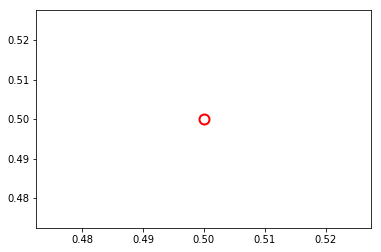

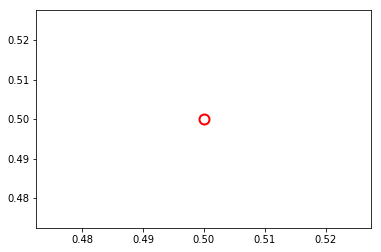

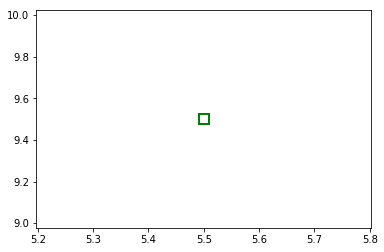

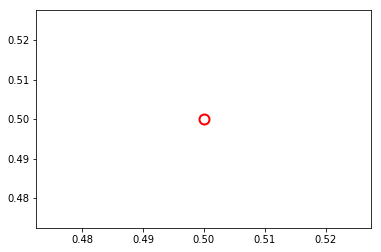

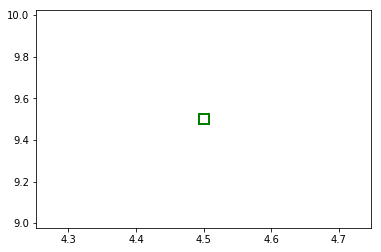

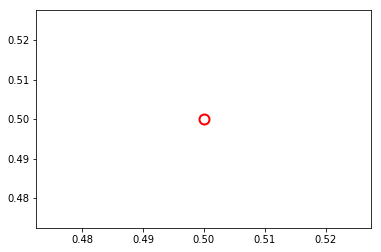

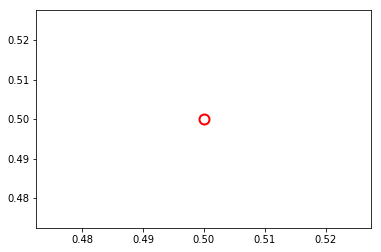

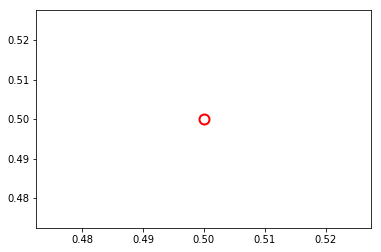

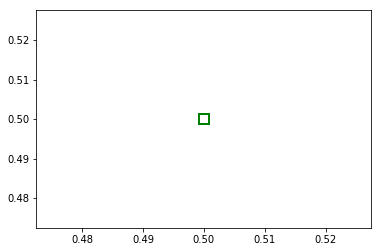

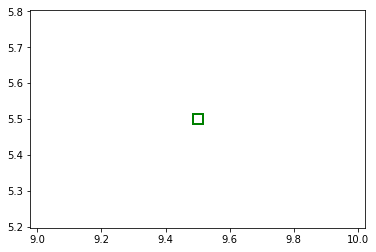

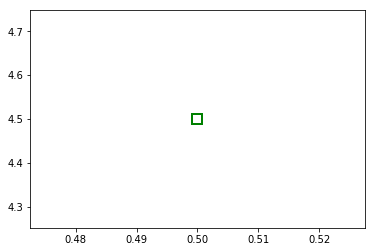

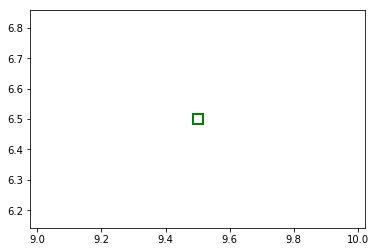

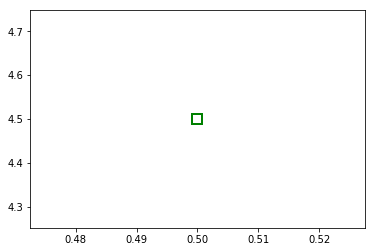

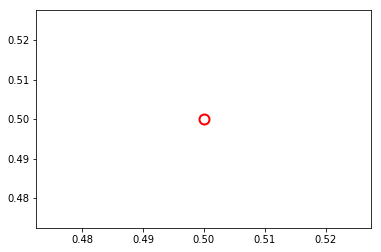

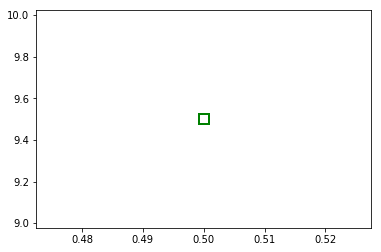

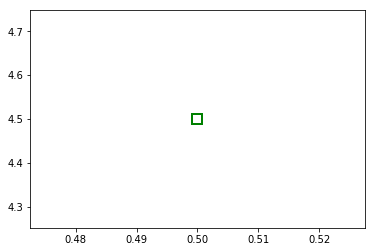

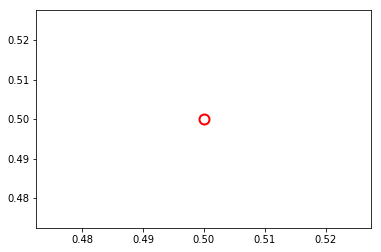

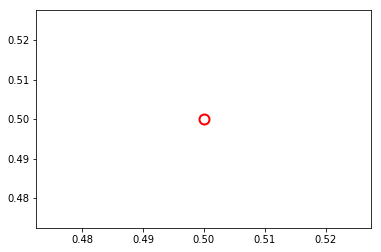

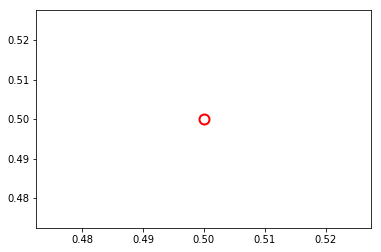

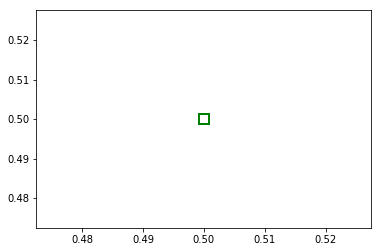

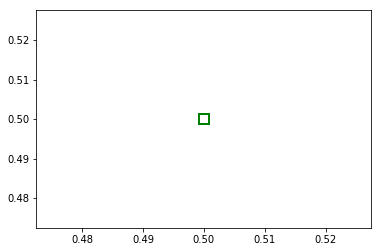

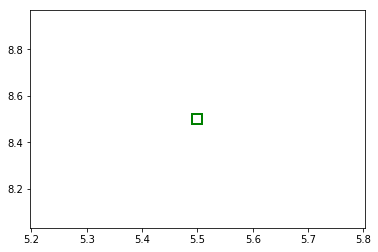

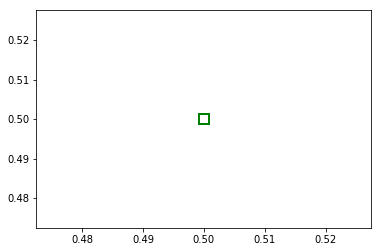

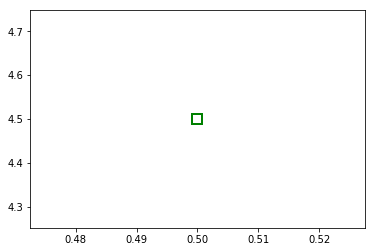

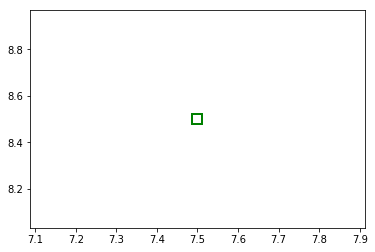

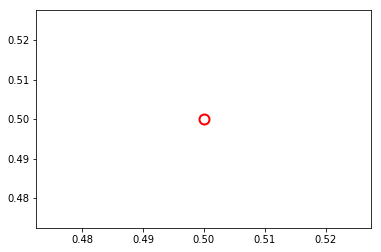

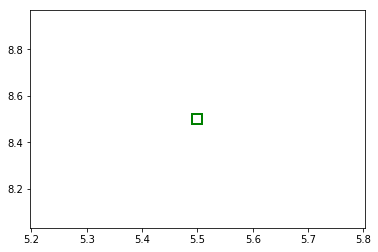

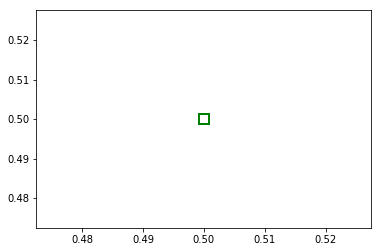

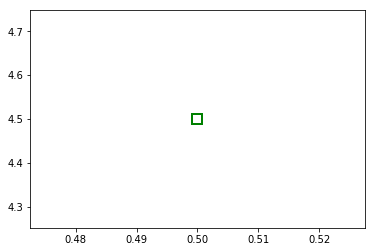

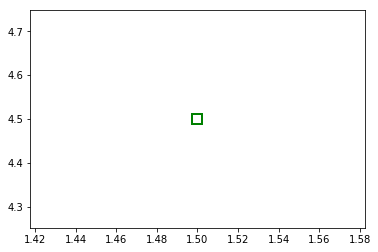

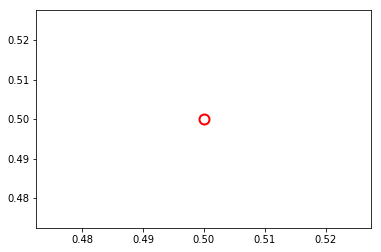

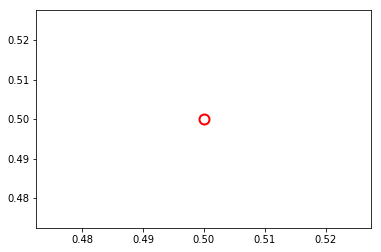

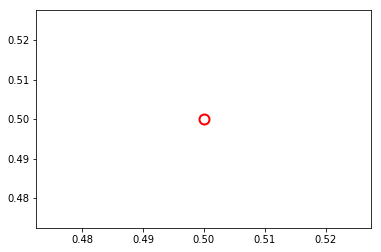

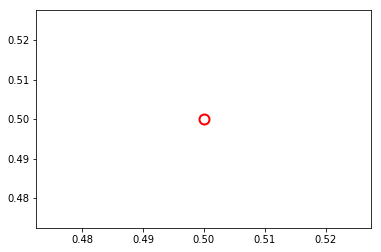

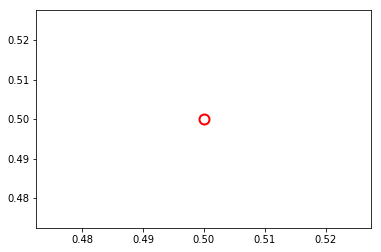

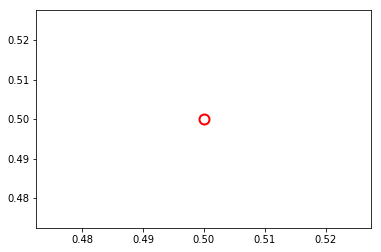

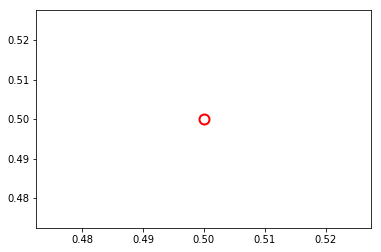

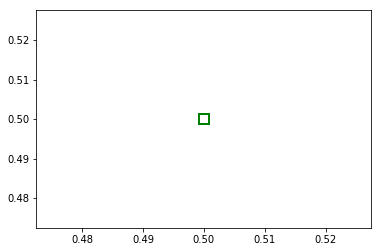

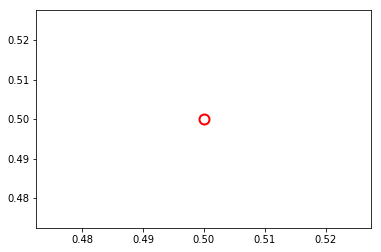

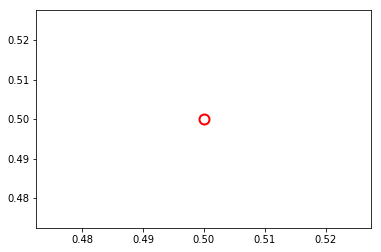

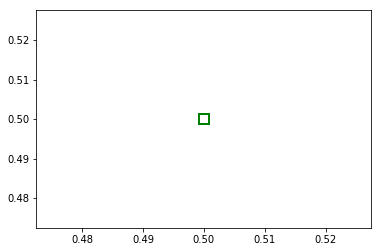

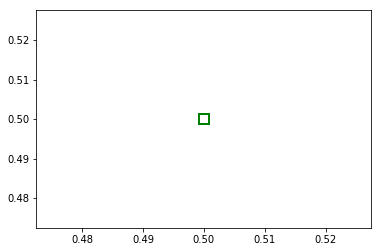

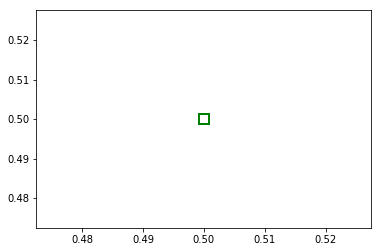

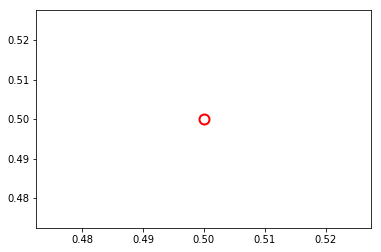

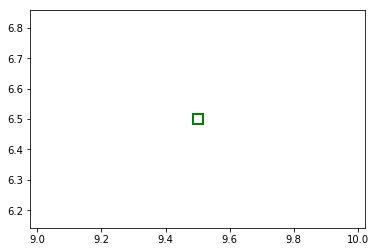

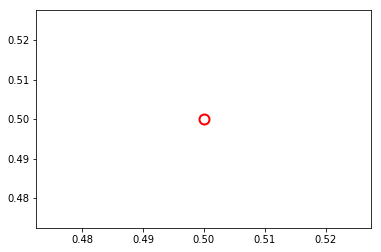

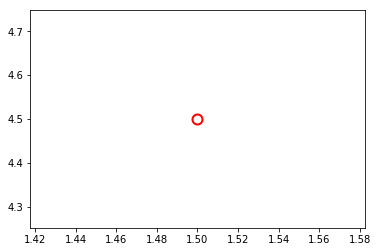

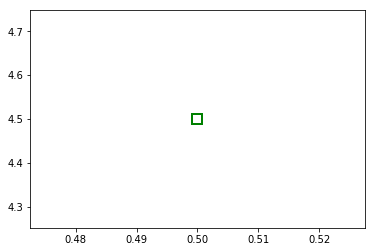

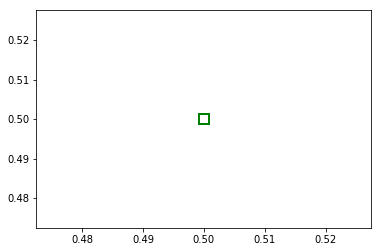

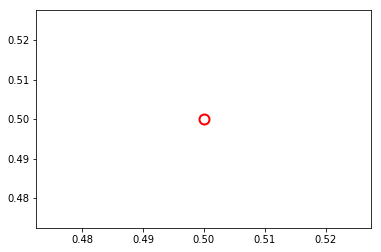

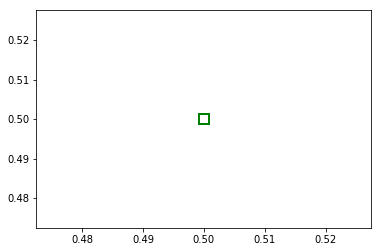

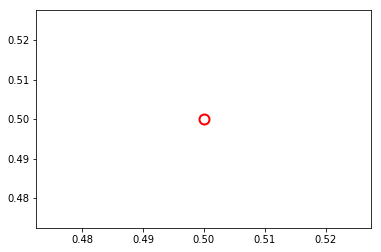

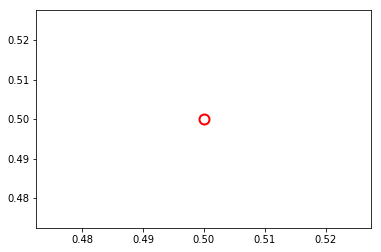

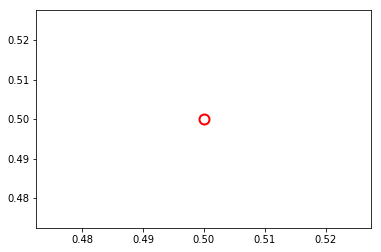

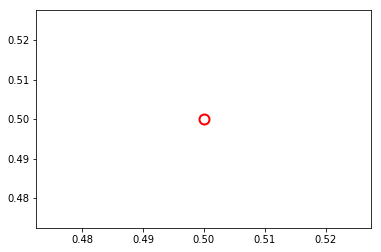

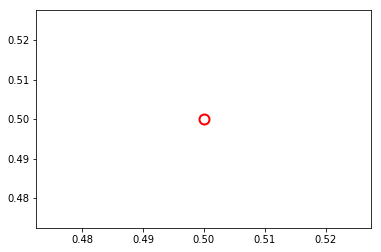

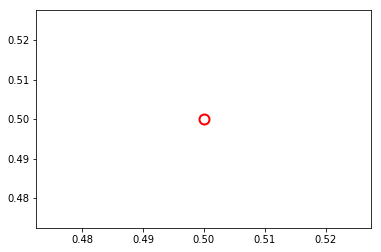

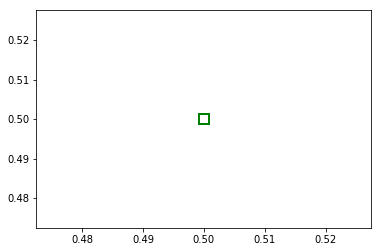

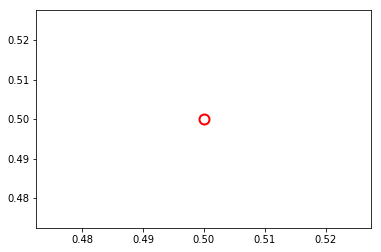

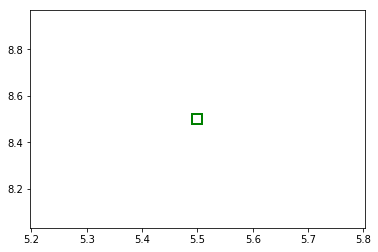

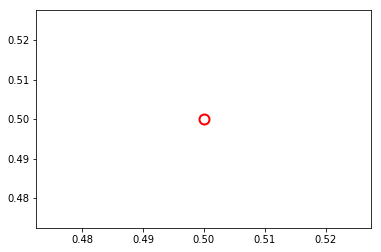

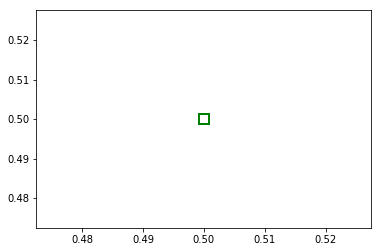

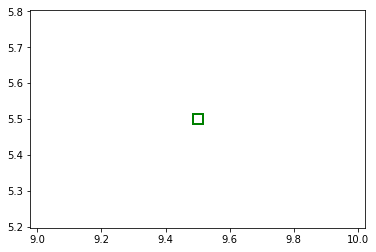

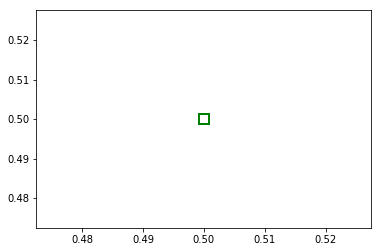

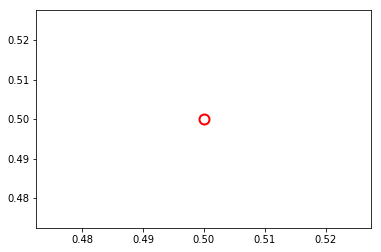

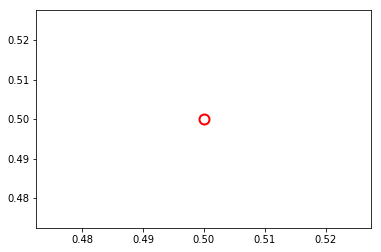

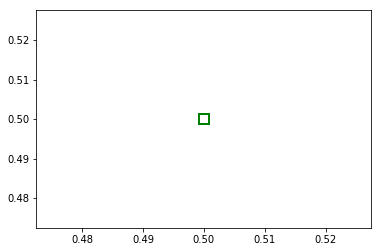

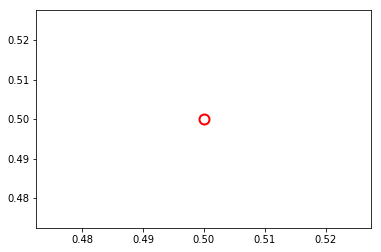

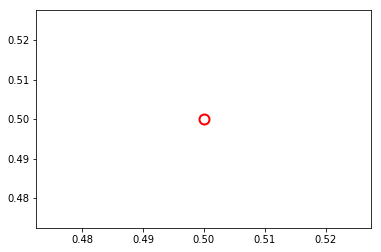

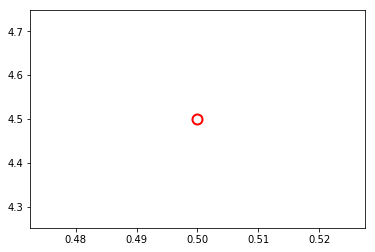

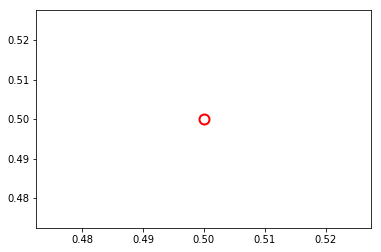

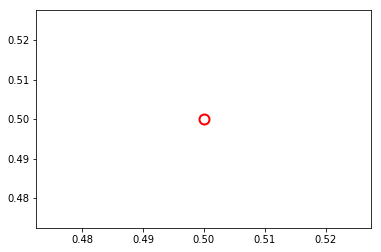

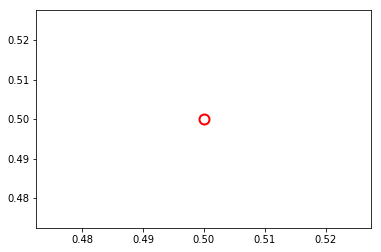

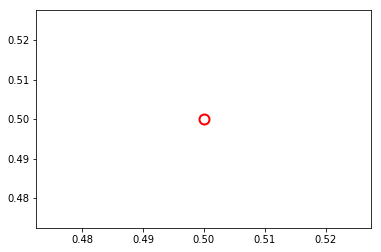

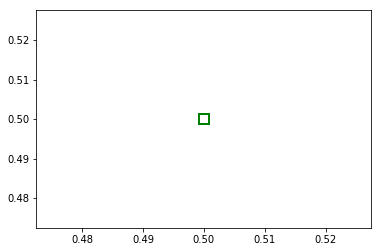

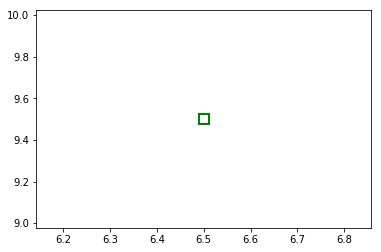

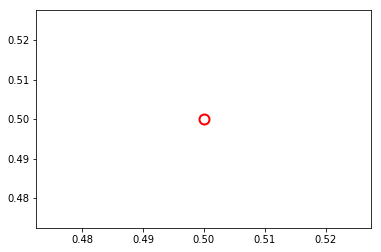

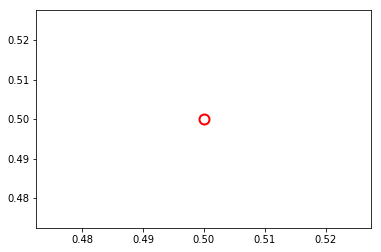

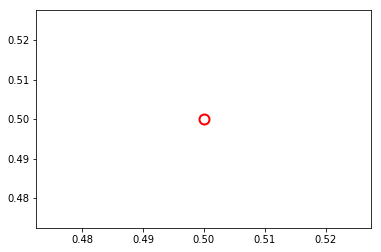

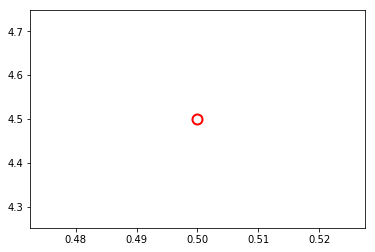

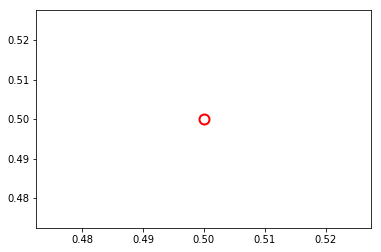

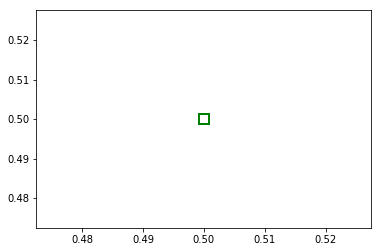

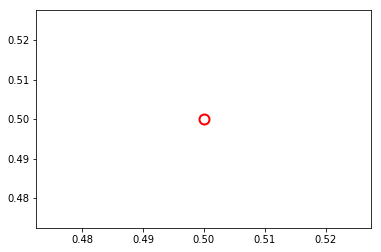

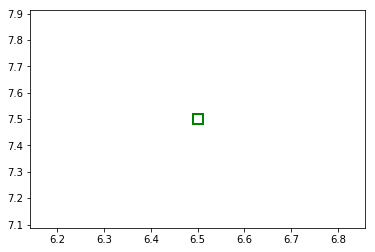

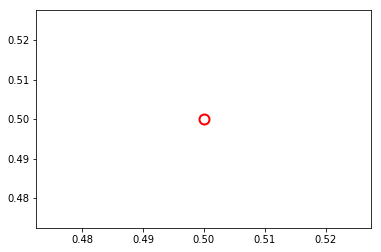

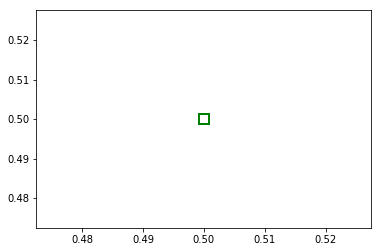

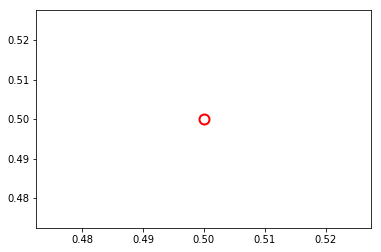

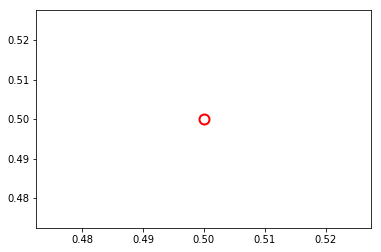

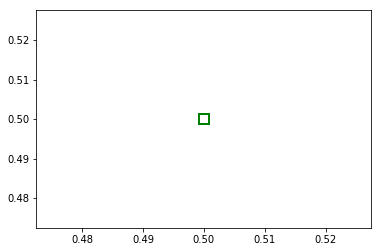

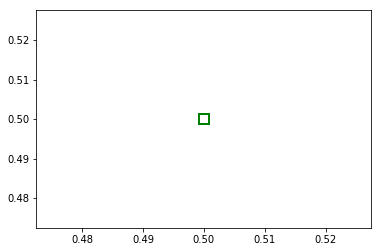

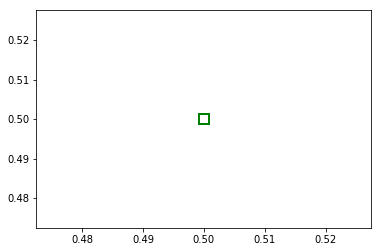

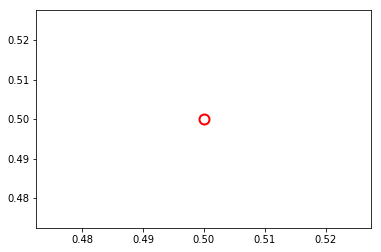

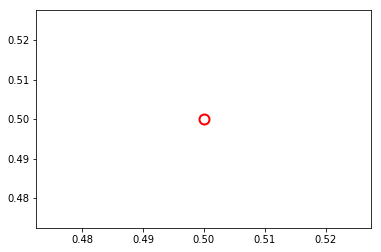

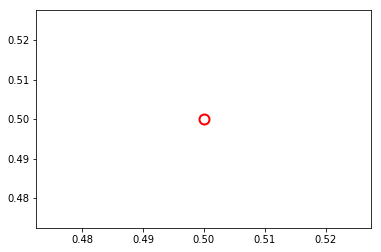

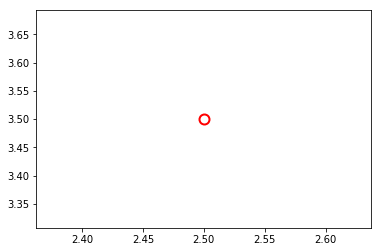

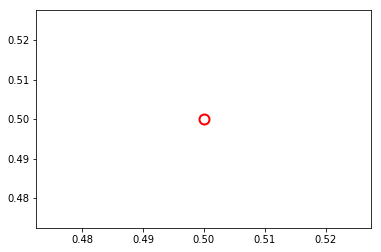

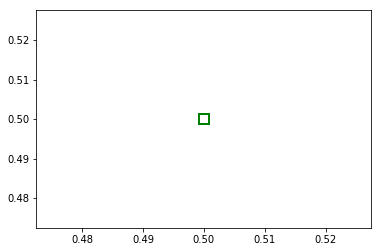

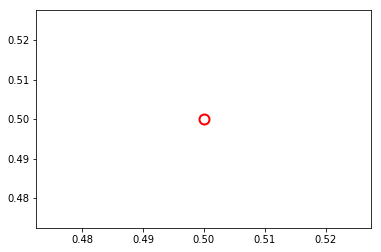

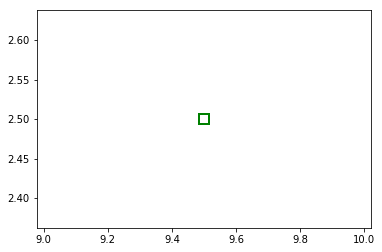

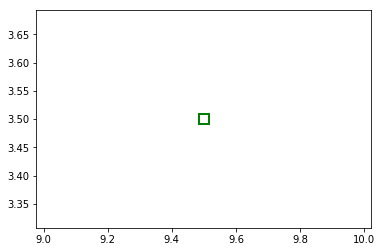

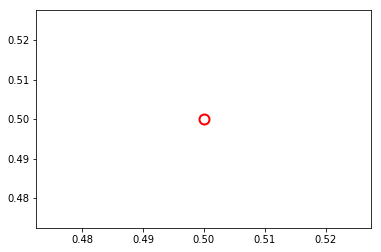

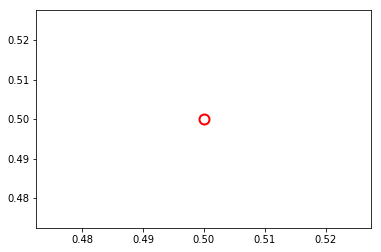

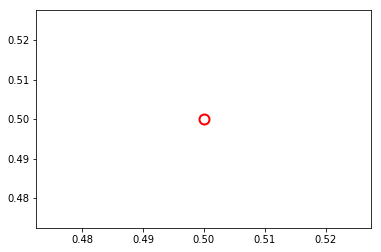

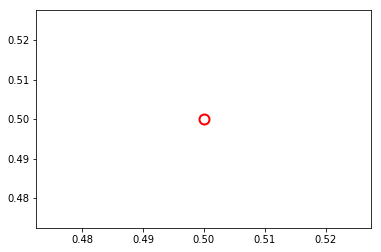

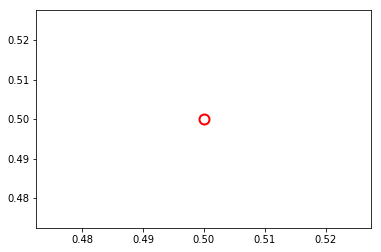

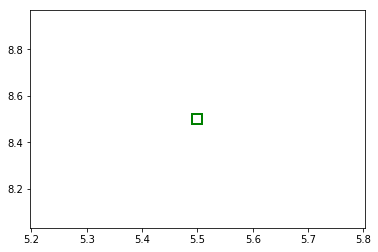

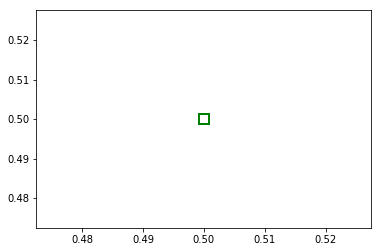

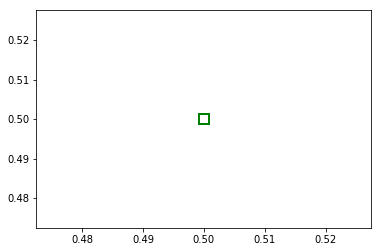

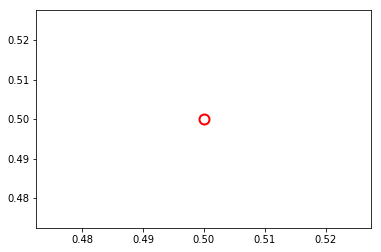

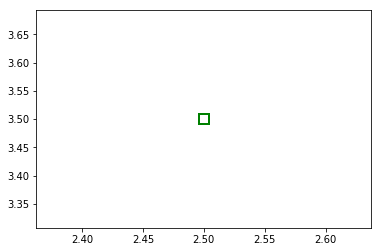

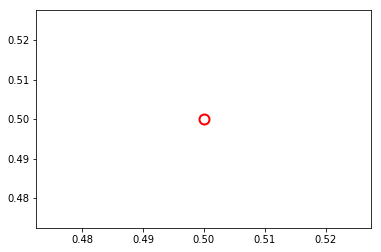

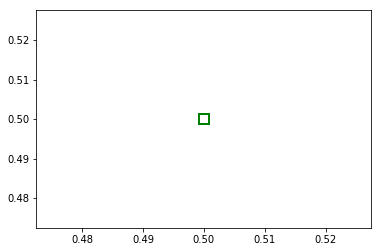

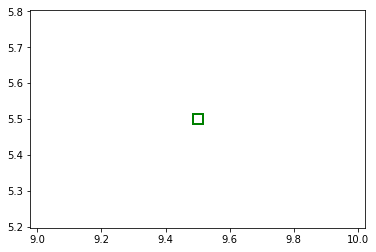

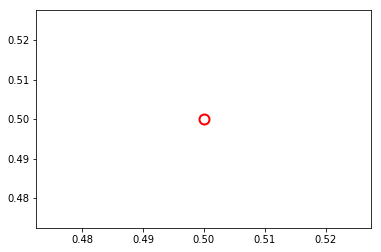

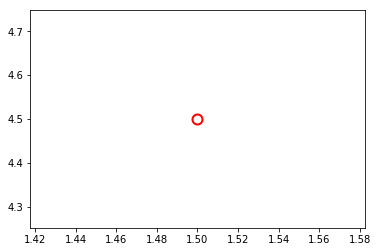

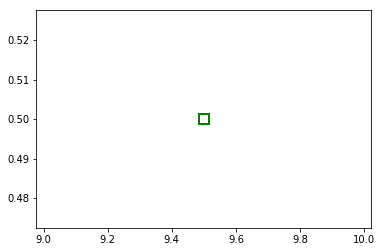

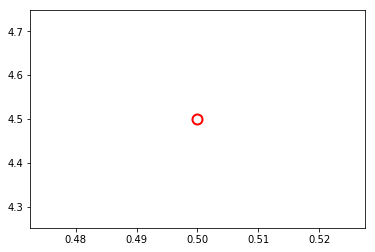

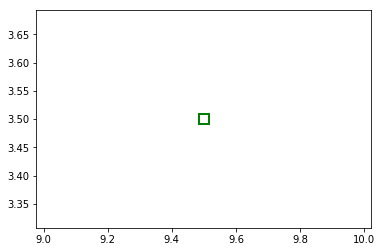

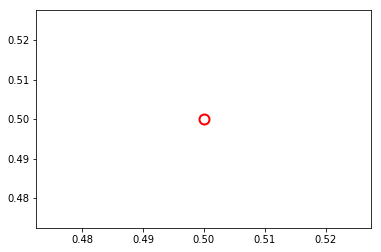

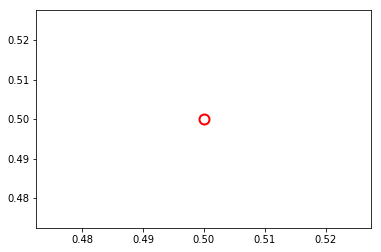

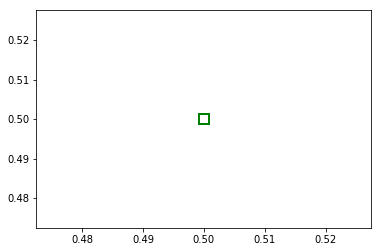

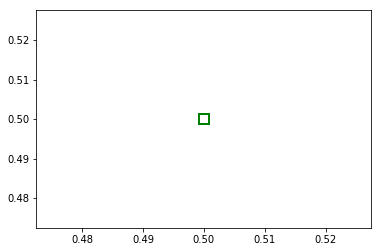

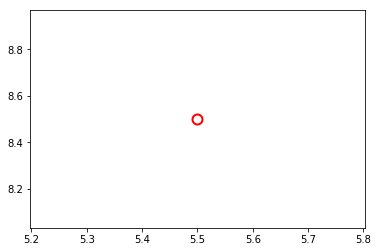

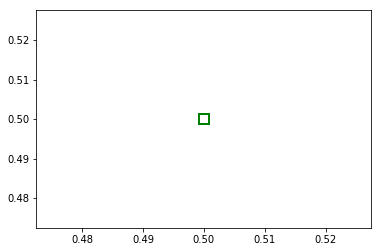

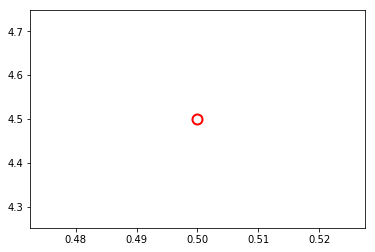

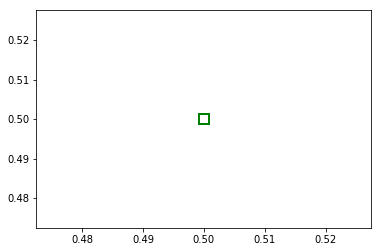

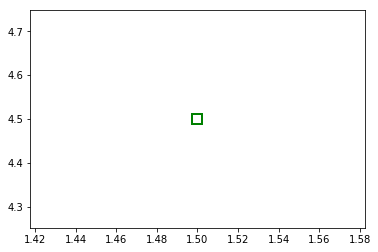

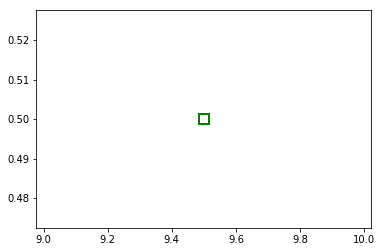

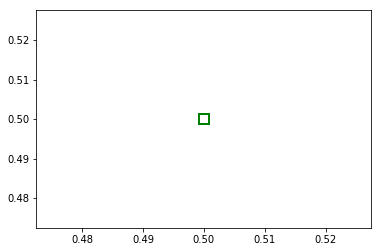

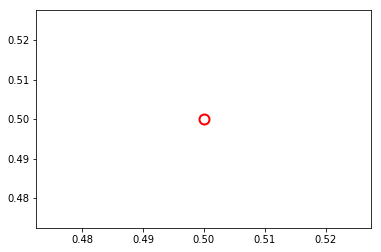

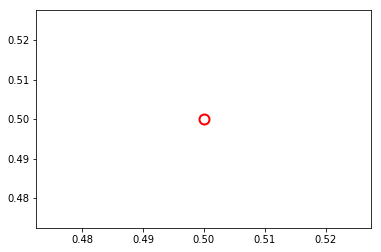

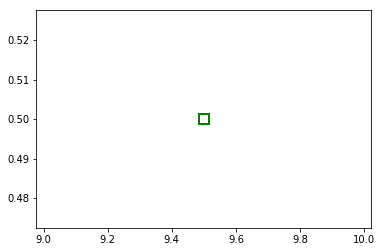

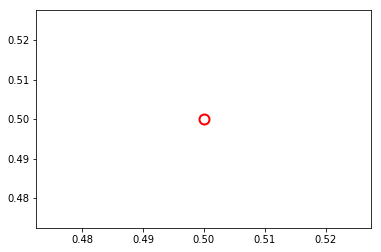

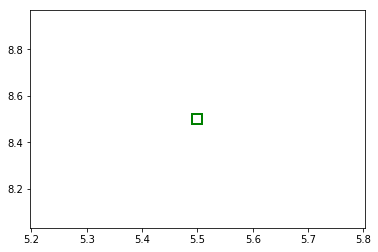

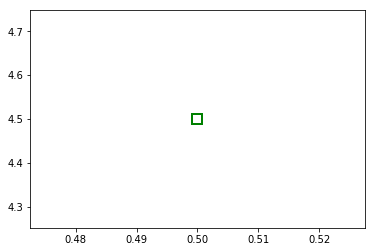

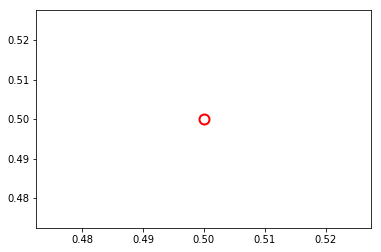

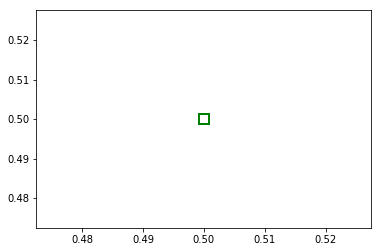

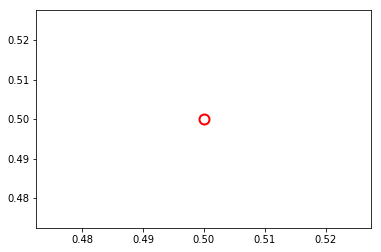

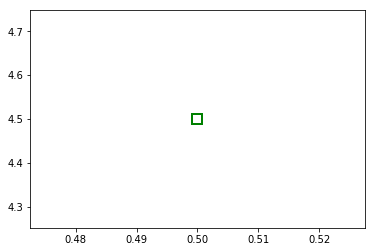

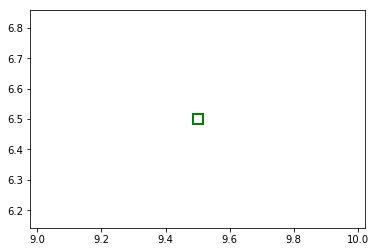

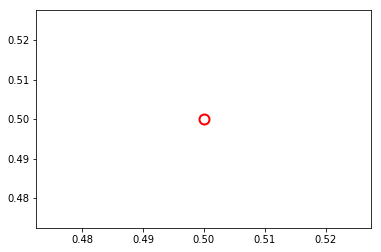

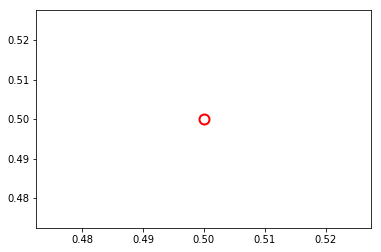

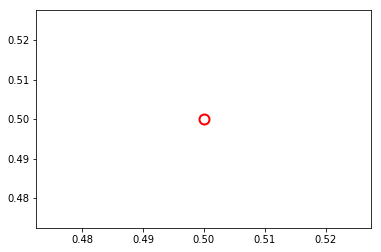

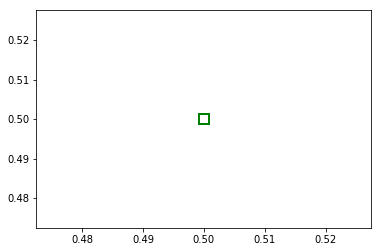

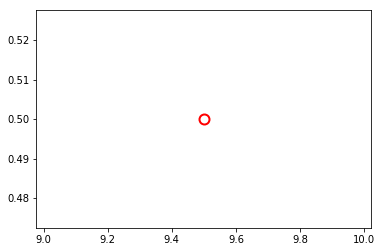

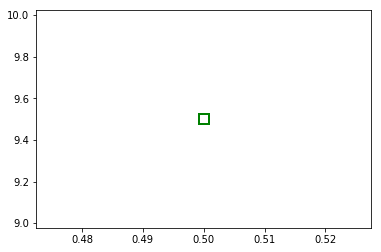

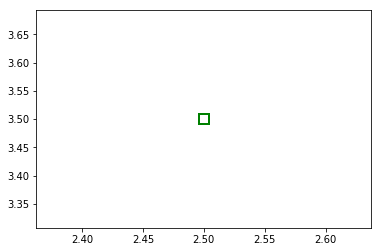

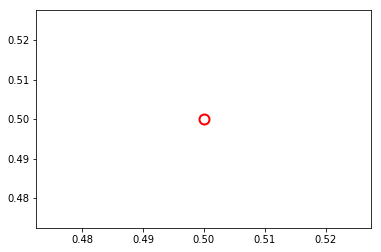

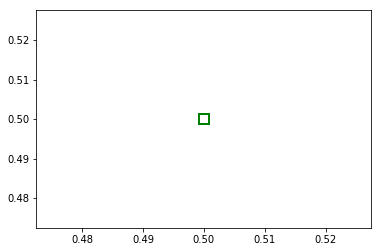

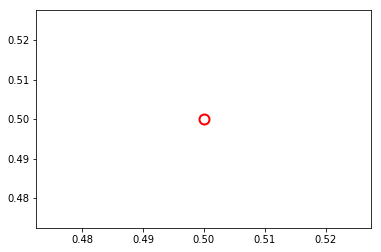

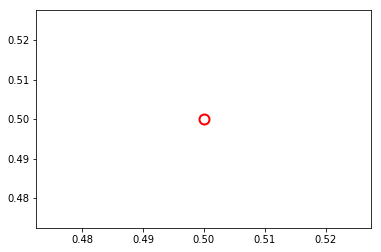

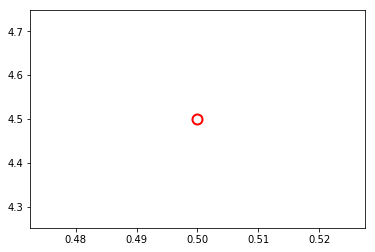

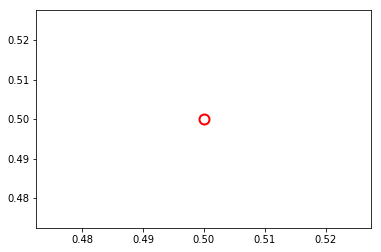

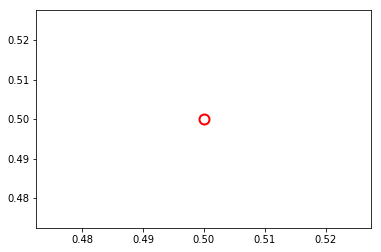

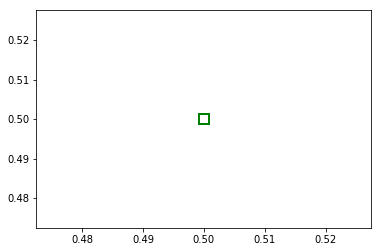

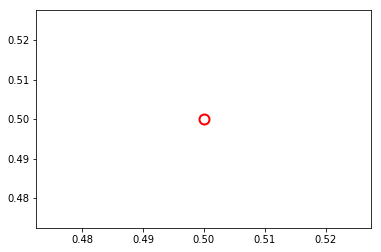

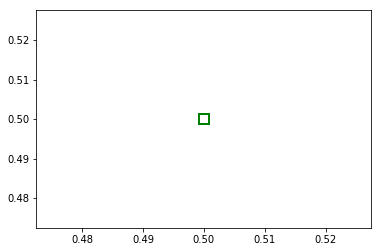

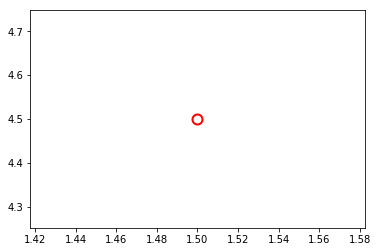

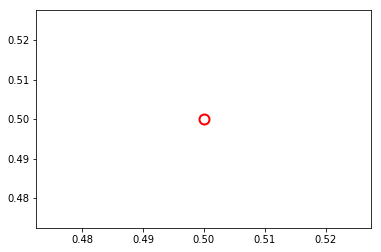

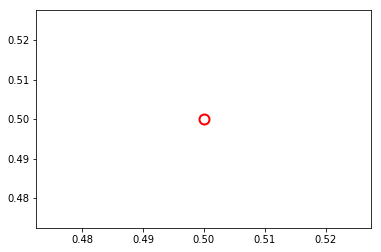

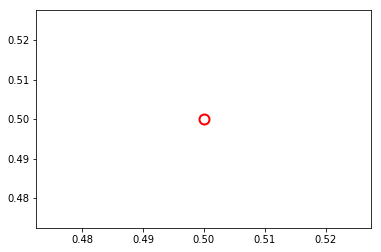

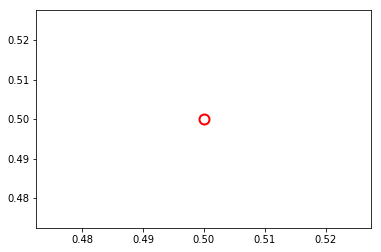

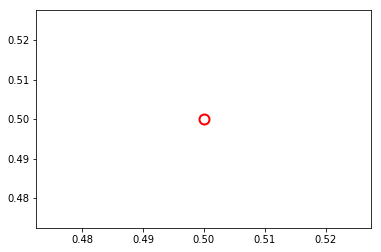

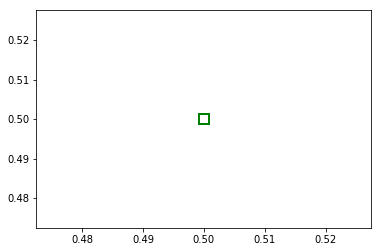

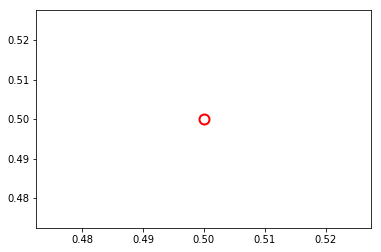

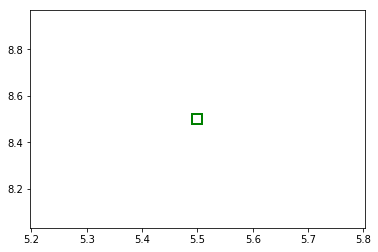

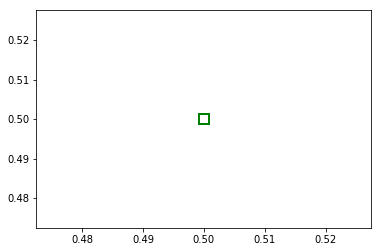

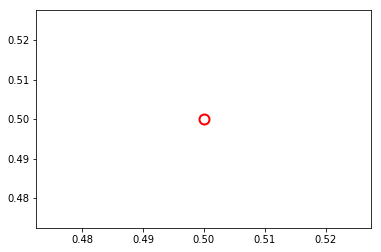

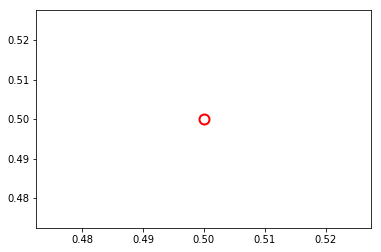

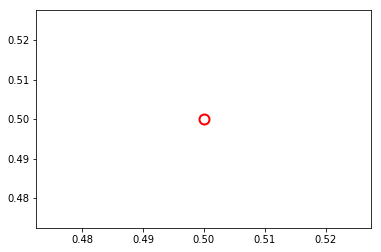

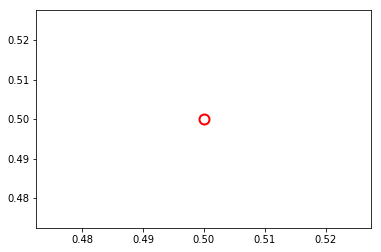

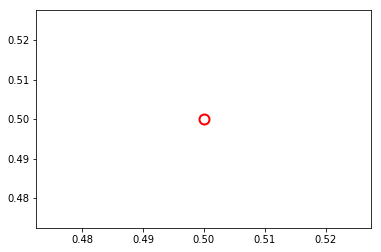

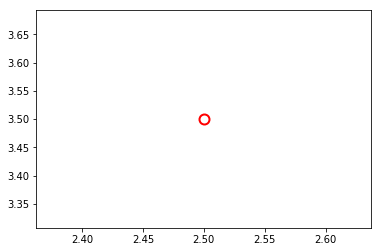

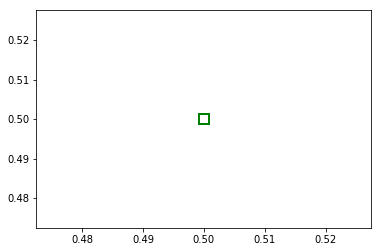

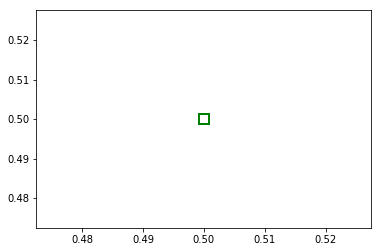

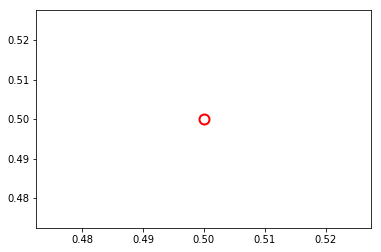

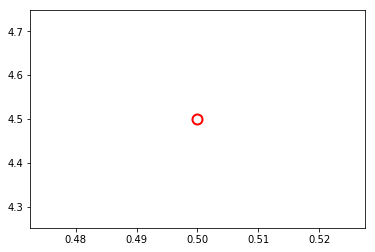

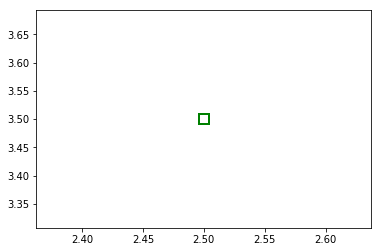

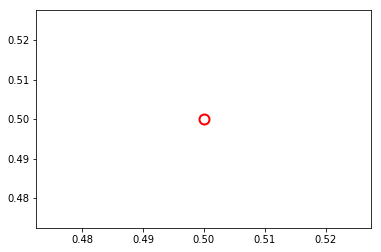

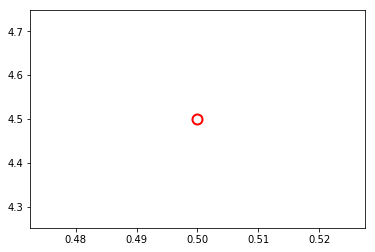

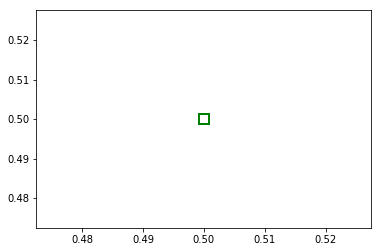

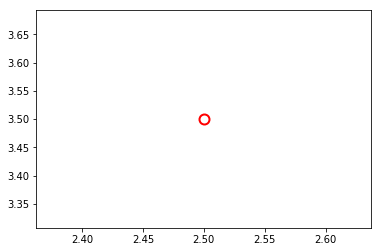

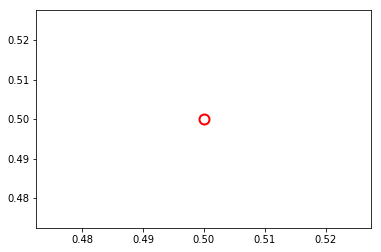

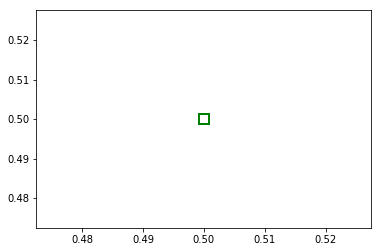

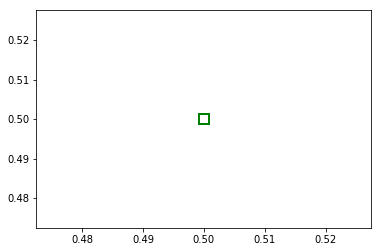

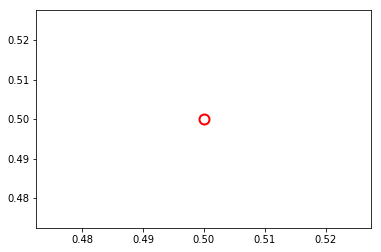

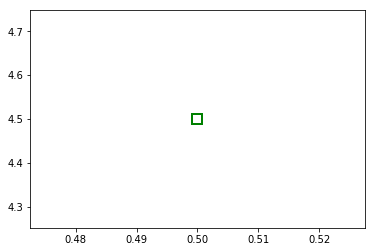

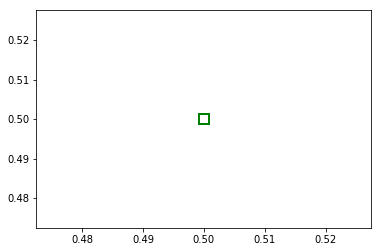

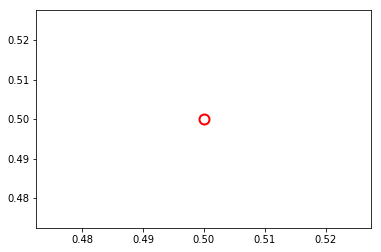

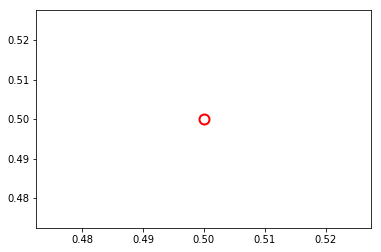

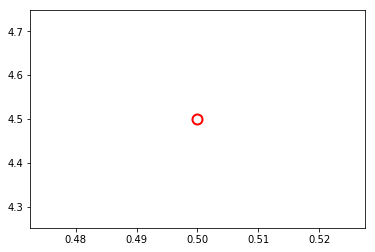

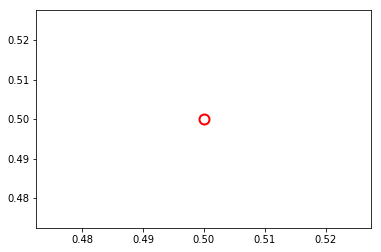

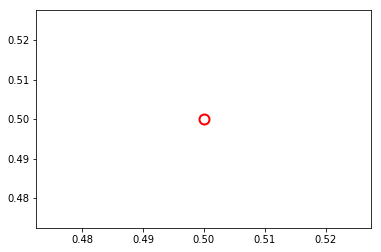

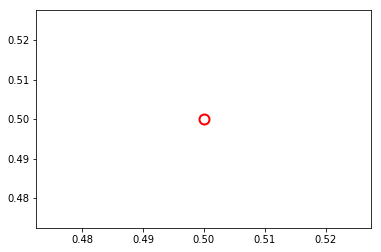

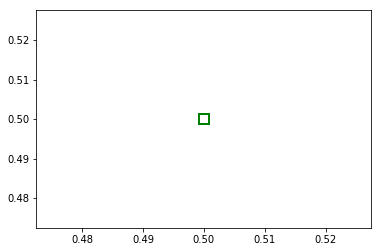

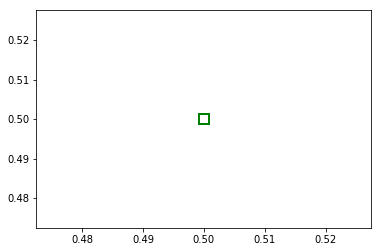

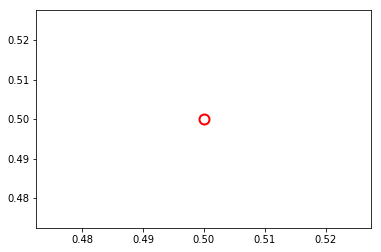

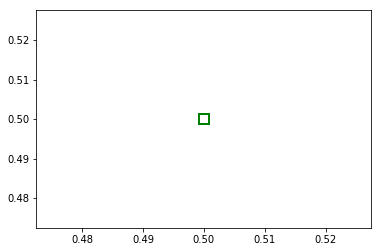

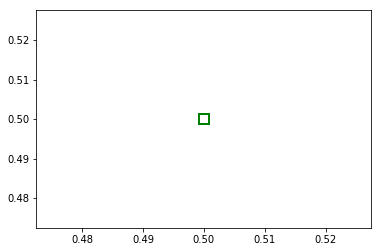

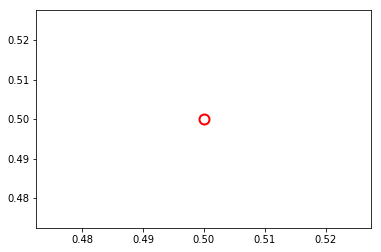

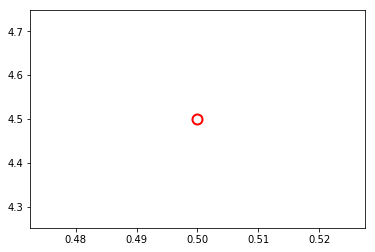

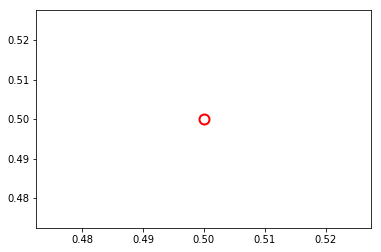

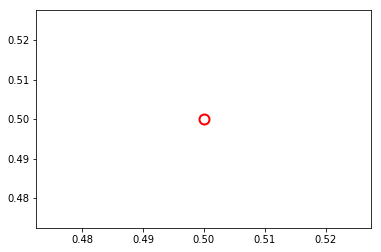

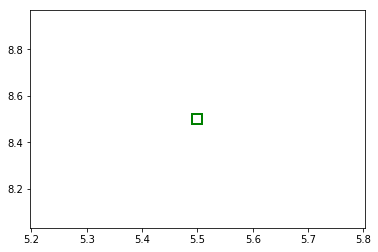

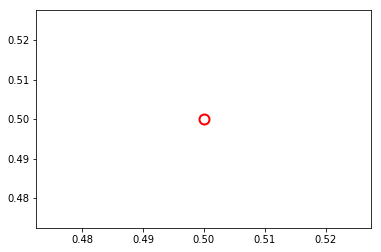

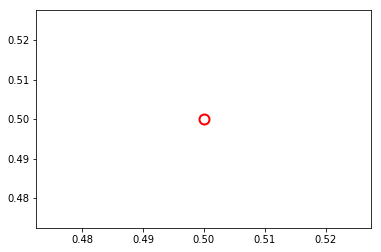

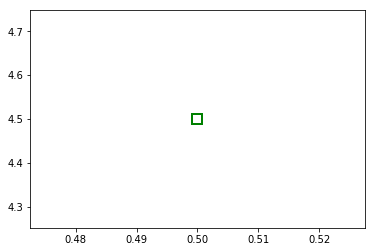

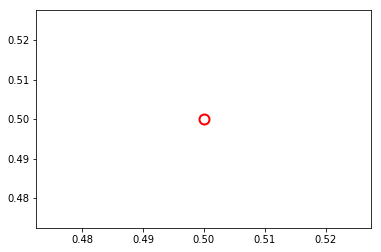

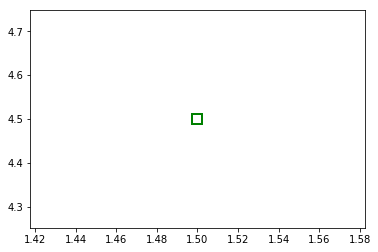

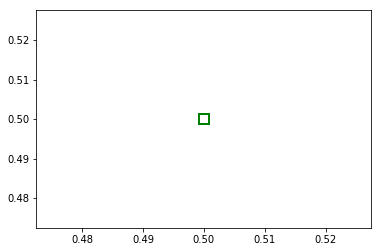

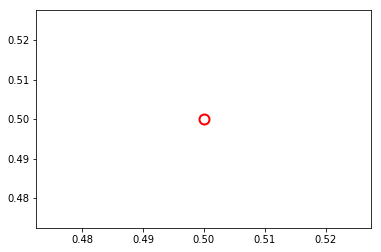

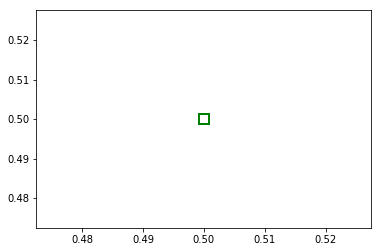

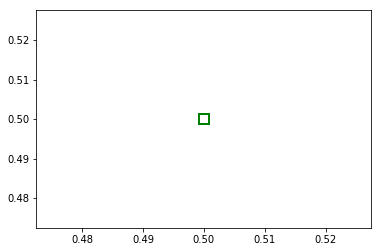

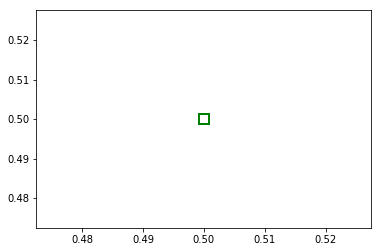

In [34]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
    show()

In [35]:
mappings = som.win_map(X)

In [36]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6.8)]), axis = 0)

In [39]:
frauds = sc.inverse_transform(X)